In [1]:
import os
import glob

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
products = ["XRT","XLF","XLE","XLU","XLI","XLK","XLV","XLY","XLP","XLB","XLC","XBI","XME","XHE","XHB","XTN","XHS","XTL"]

In [3]:
os.getcwd()

'c:\\Users\\James Stanley\\Documents\\GitHub\\backtest_utilities\\approved_projects\\daily_portfolio_construction\\data\\global_equities'

In [4]:
merge_lst = []

path      = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
for product in products:
    
    for f in csv_files:
        if product+"_forecasts" in f:
            df = pd.read_csv(f)      

            merge_lst.append(df)

merge_df = pd.concat(merge_lst,axis=0).reset_index()


merge_df.reset_index()

,level_0,index,Date,asofdate,pointForecast,Close,forecastday,product_name,MA_50,MA_diff_50
0,0,0,2014-05-06 00:00:00-04:00,2014-05-07 00:00:00-04:00,35.947092,35.974495,1,XRT,36.939464,-0.002272
1,1,1,2014-05-07 00:00:00-04:00,2014-05-08 00:00:00-04:00,36.000205,35.598076,2,XRT,36.920400,-0.019065
2,2,2,2014-05-08 00:00:00-04:00,2014-05-09 00:00:00-04:00,35.986629,35.803799,3,XRT,36.891728,-0.028672
3,3,3,2014-05-09 00:00:00-04:00,2014-05-12 00:00:00-04:00,35.990096,36.442833,4,XRT,36.871204,-0.020524
4,4,4,2014-05-12 00:00:00-04:00,2014-05-13 00:00:00-04:00,35.989210,37.151901,5,XRT,36.865823,-0.005381
...,...,...,...,...,...,...,...,...,...,...
35410,35410,2165,2022-12-08 00:00:00-05:00,2022-12-09 00:00:00-05:00,84.525778,84.677643,1,XTL,82.560550,0.118104
35411,35411,2166,2022-12-09 00:00:00-05:00,2022-12-12 00:00:00-05:00,84.393443,83.640244,2,XTL,82.697008,0.136458
35412,35412,2167,2022-12-12 00:00:00-05:00,2022-12-13 00:00:00-05:00,84.537442,84.587868,3,XTL,82.856009,0.159001
35413,35413,2168,2022-12-13 00:00:00-05:00,2022-12-14 00:00:00-05:00,84.409903,85.006813,4,XTL,82.973914,0.117904


XRT


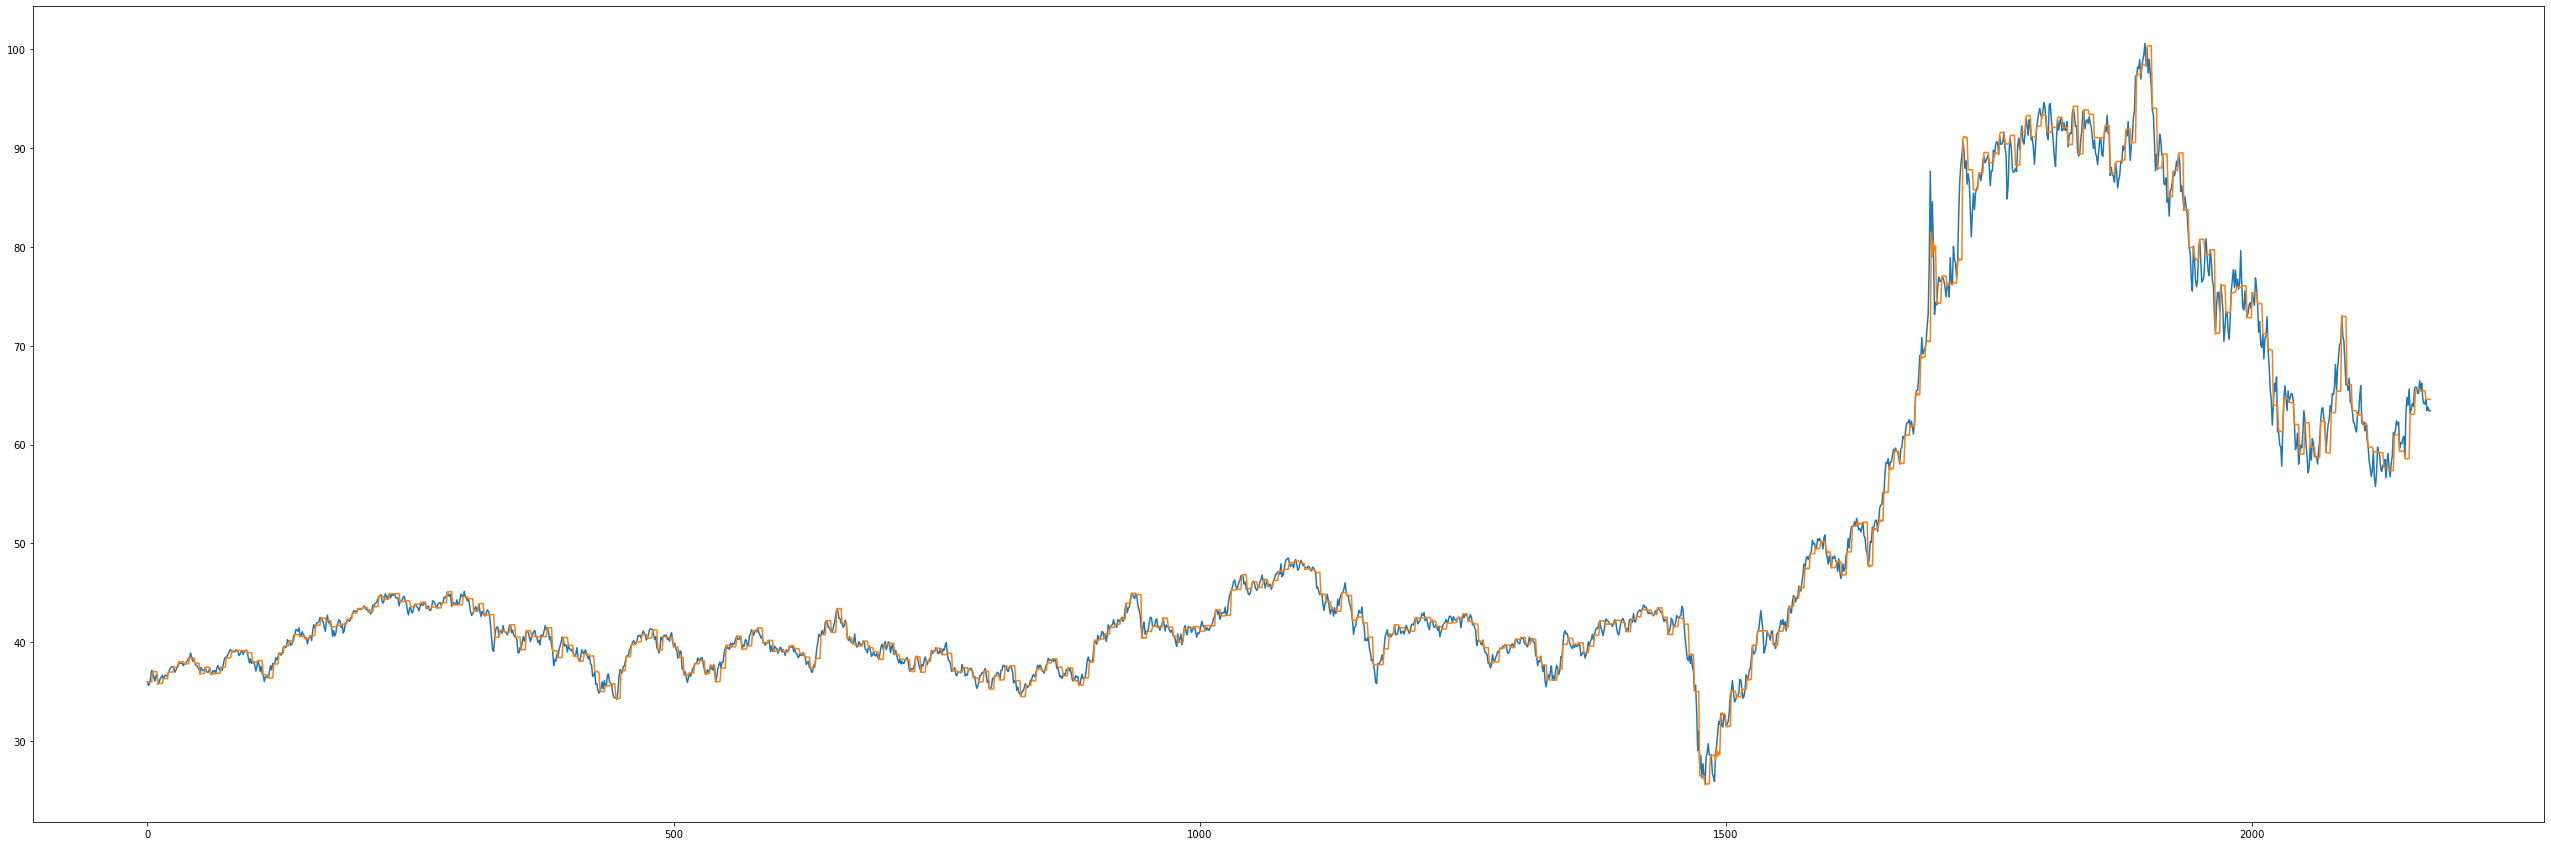

XLF


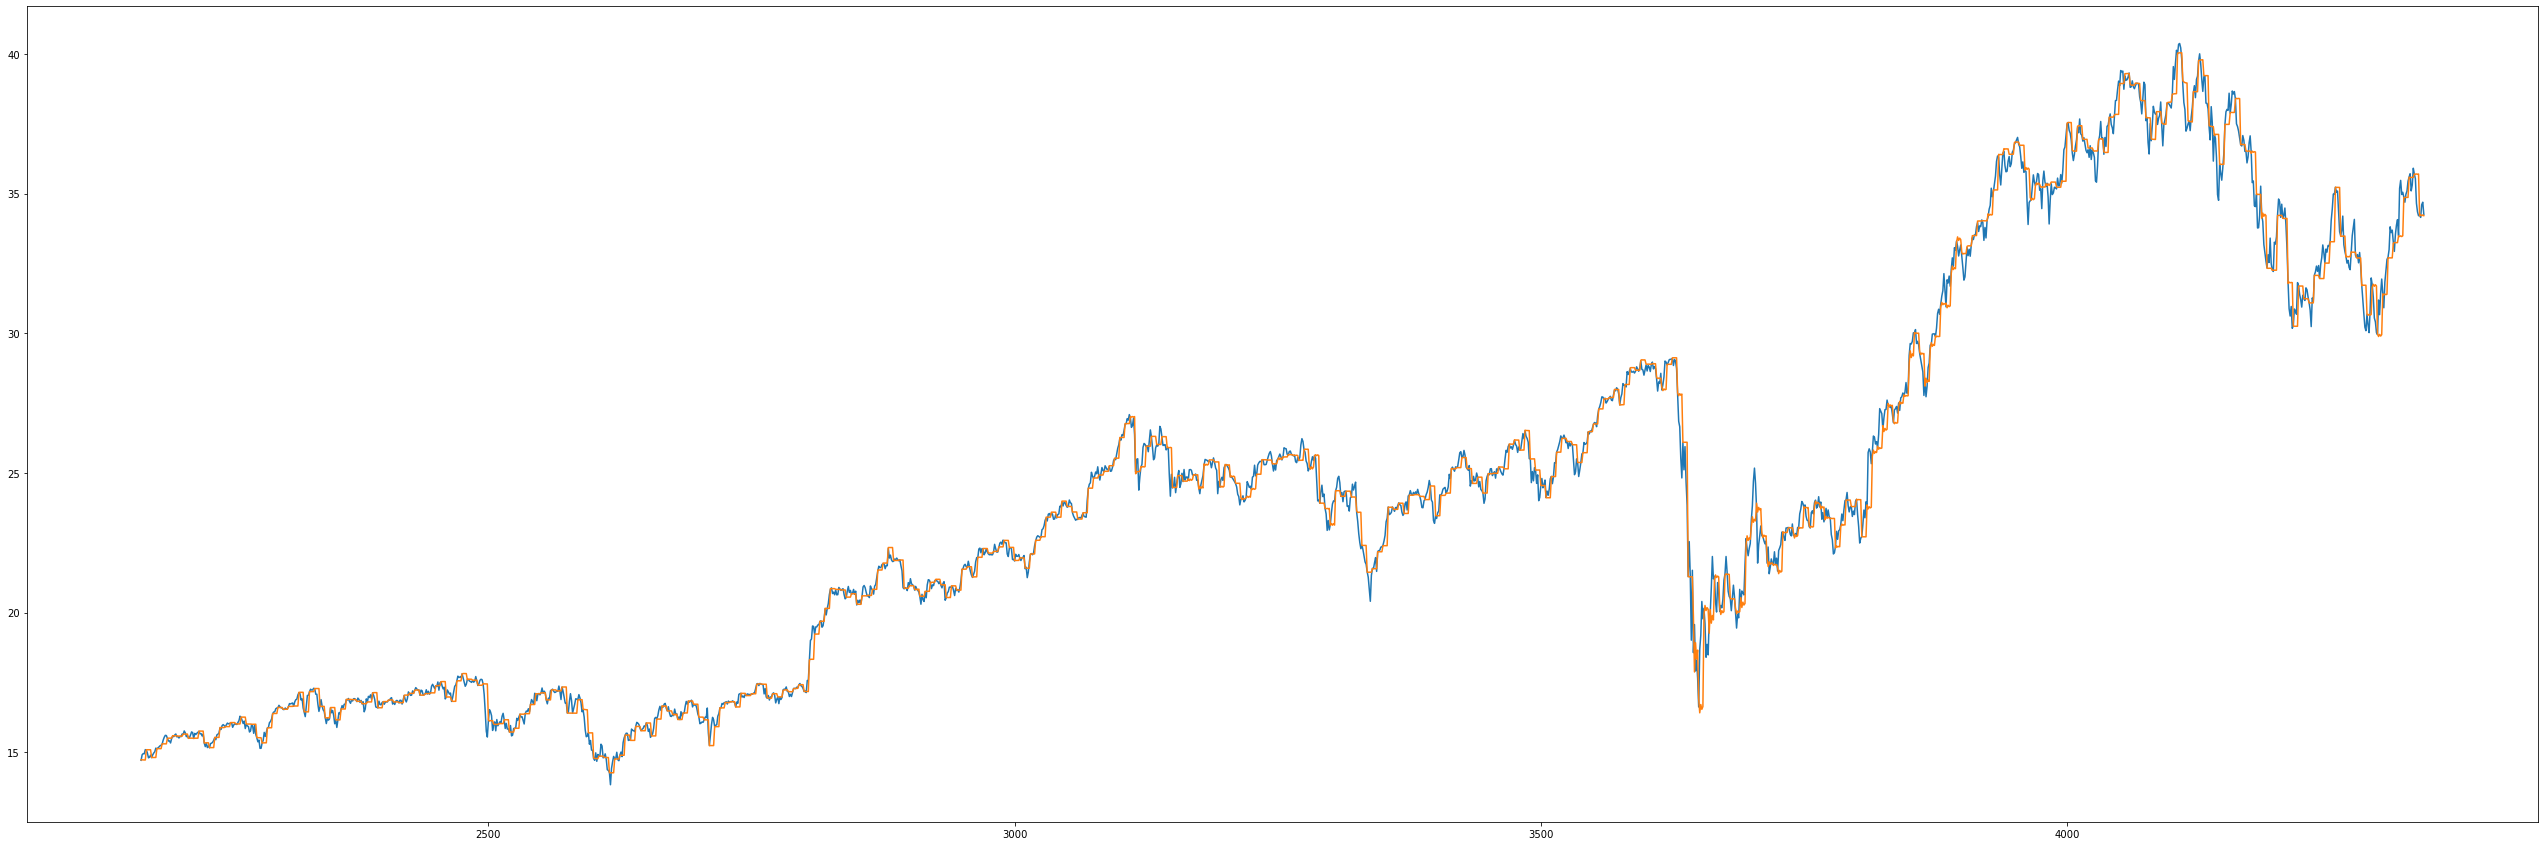

XLE


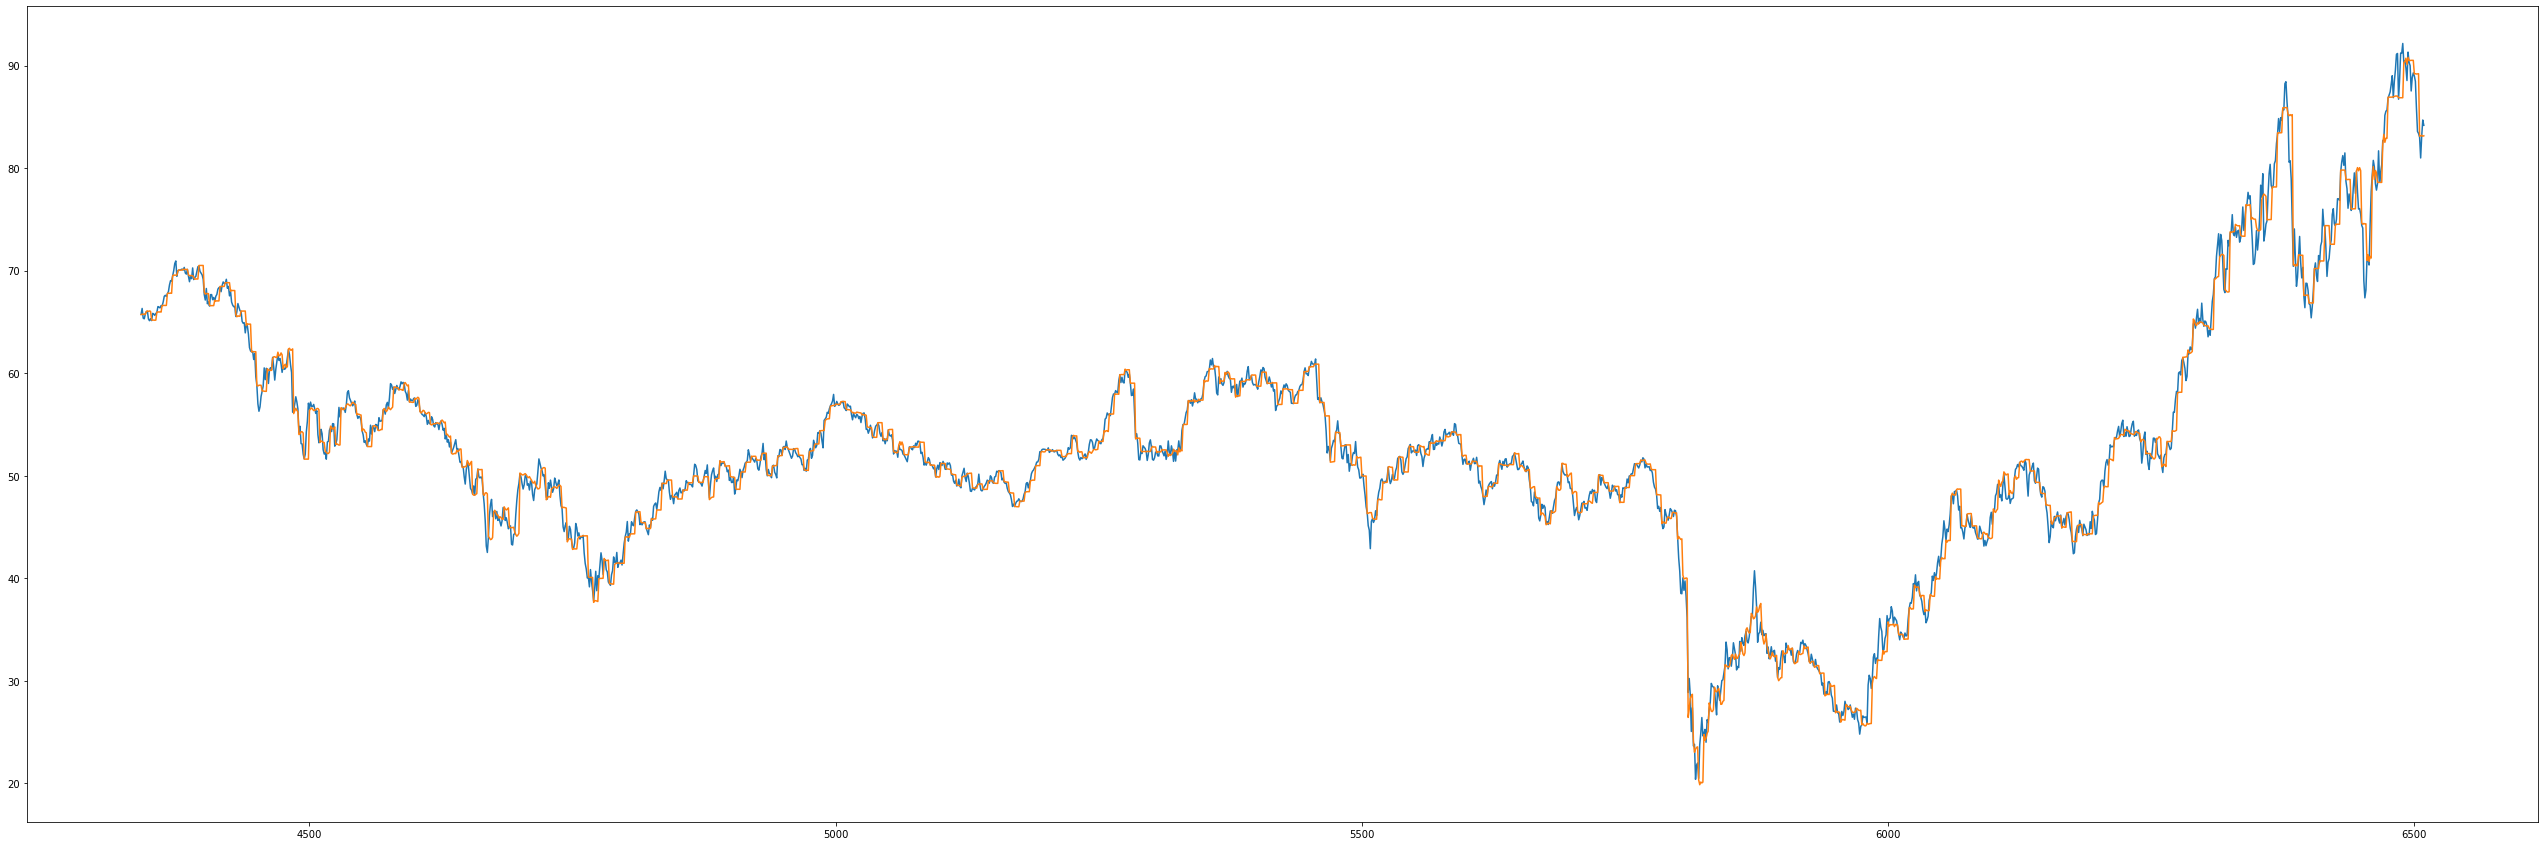

XLU


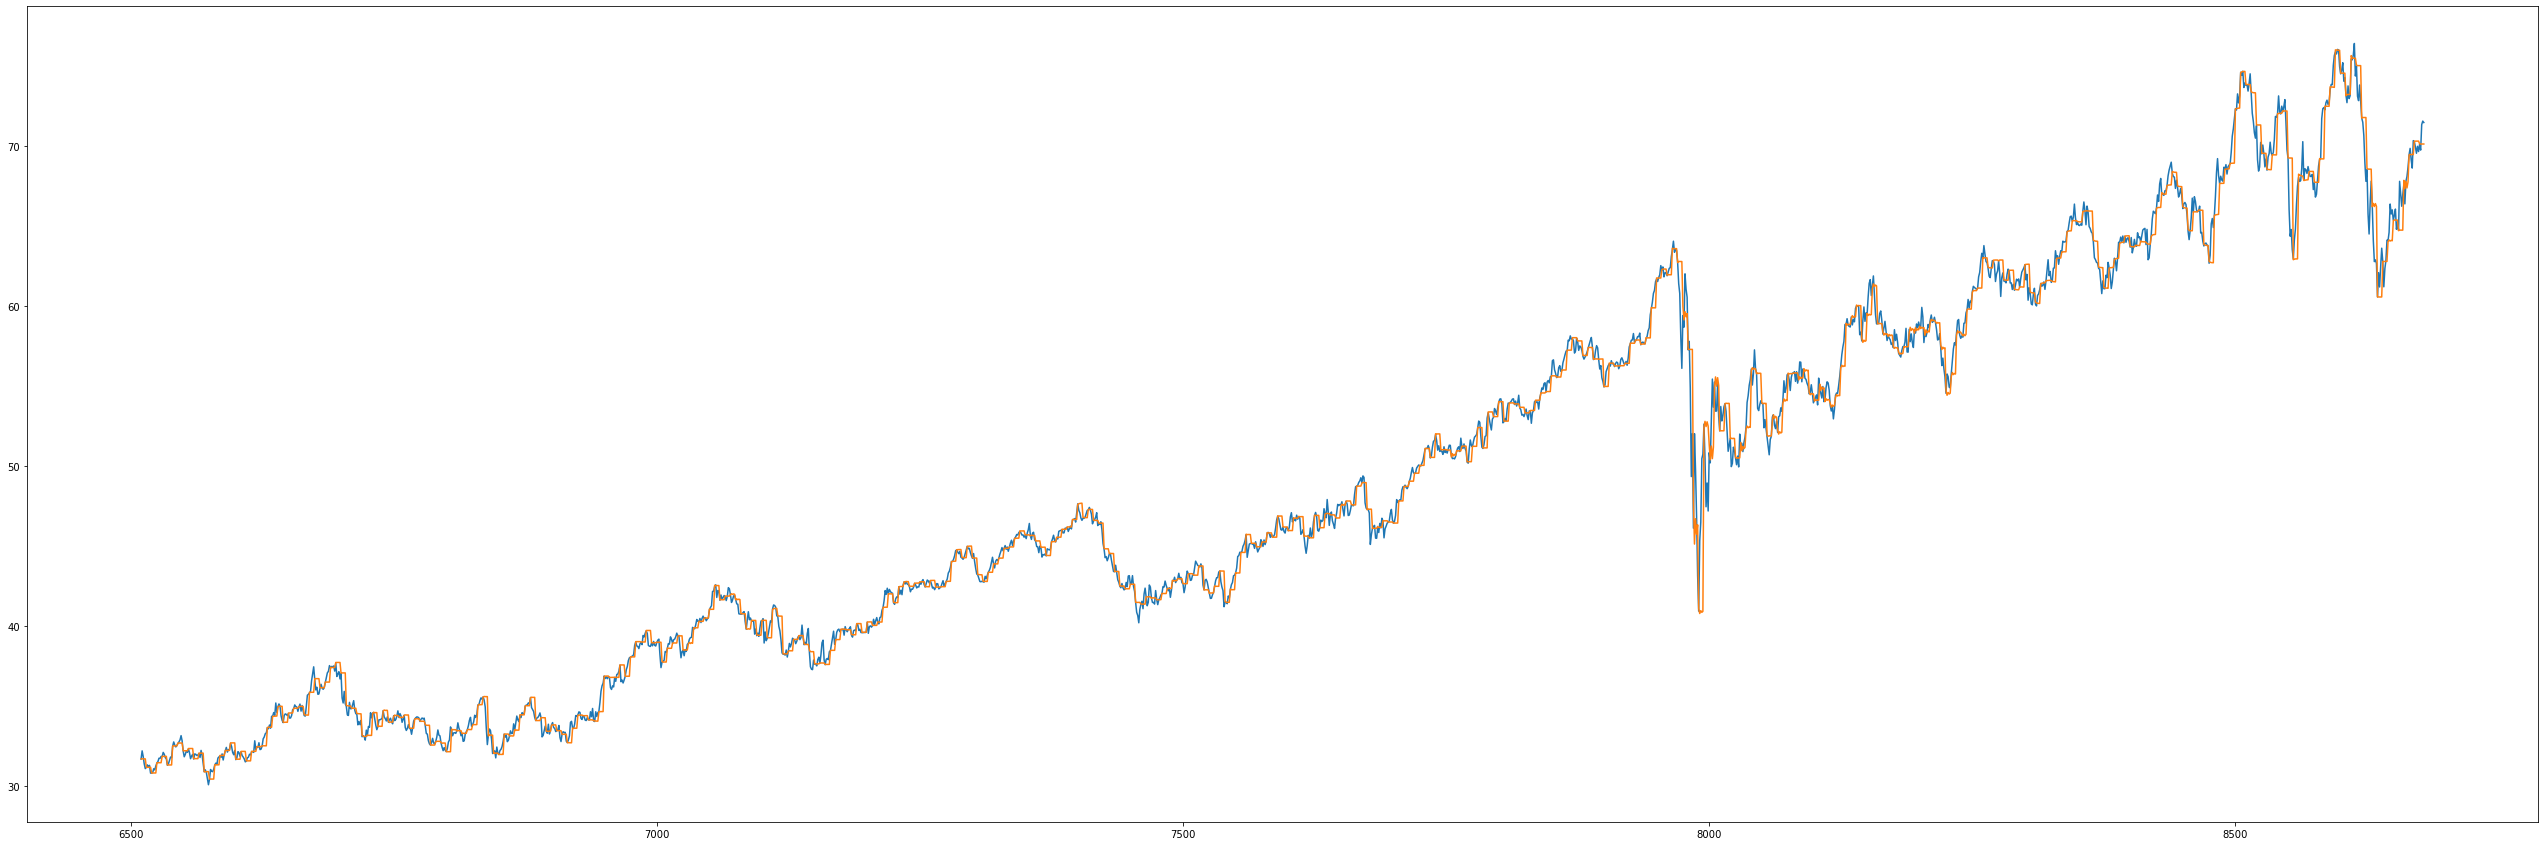

XLI


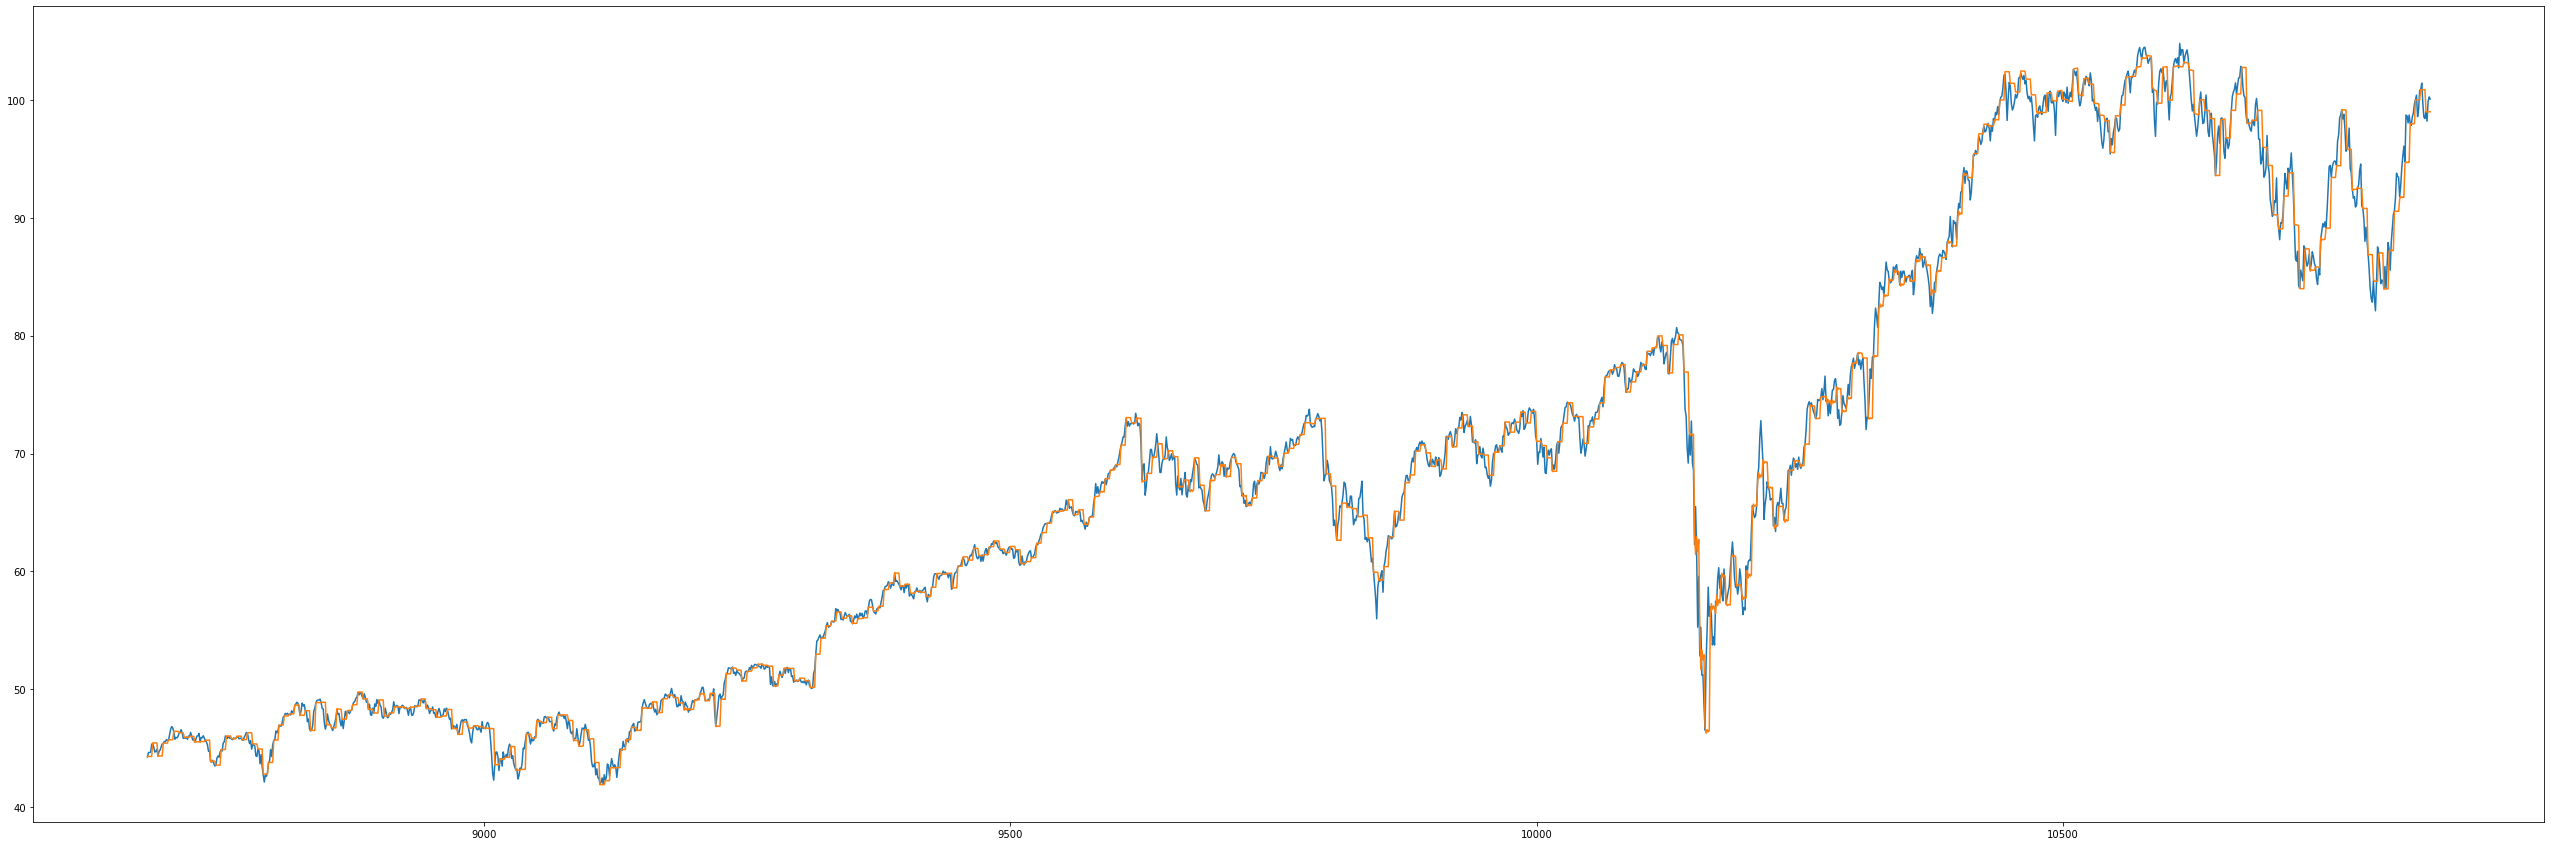

XLK


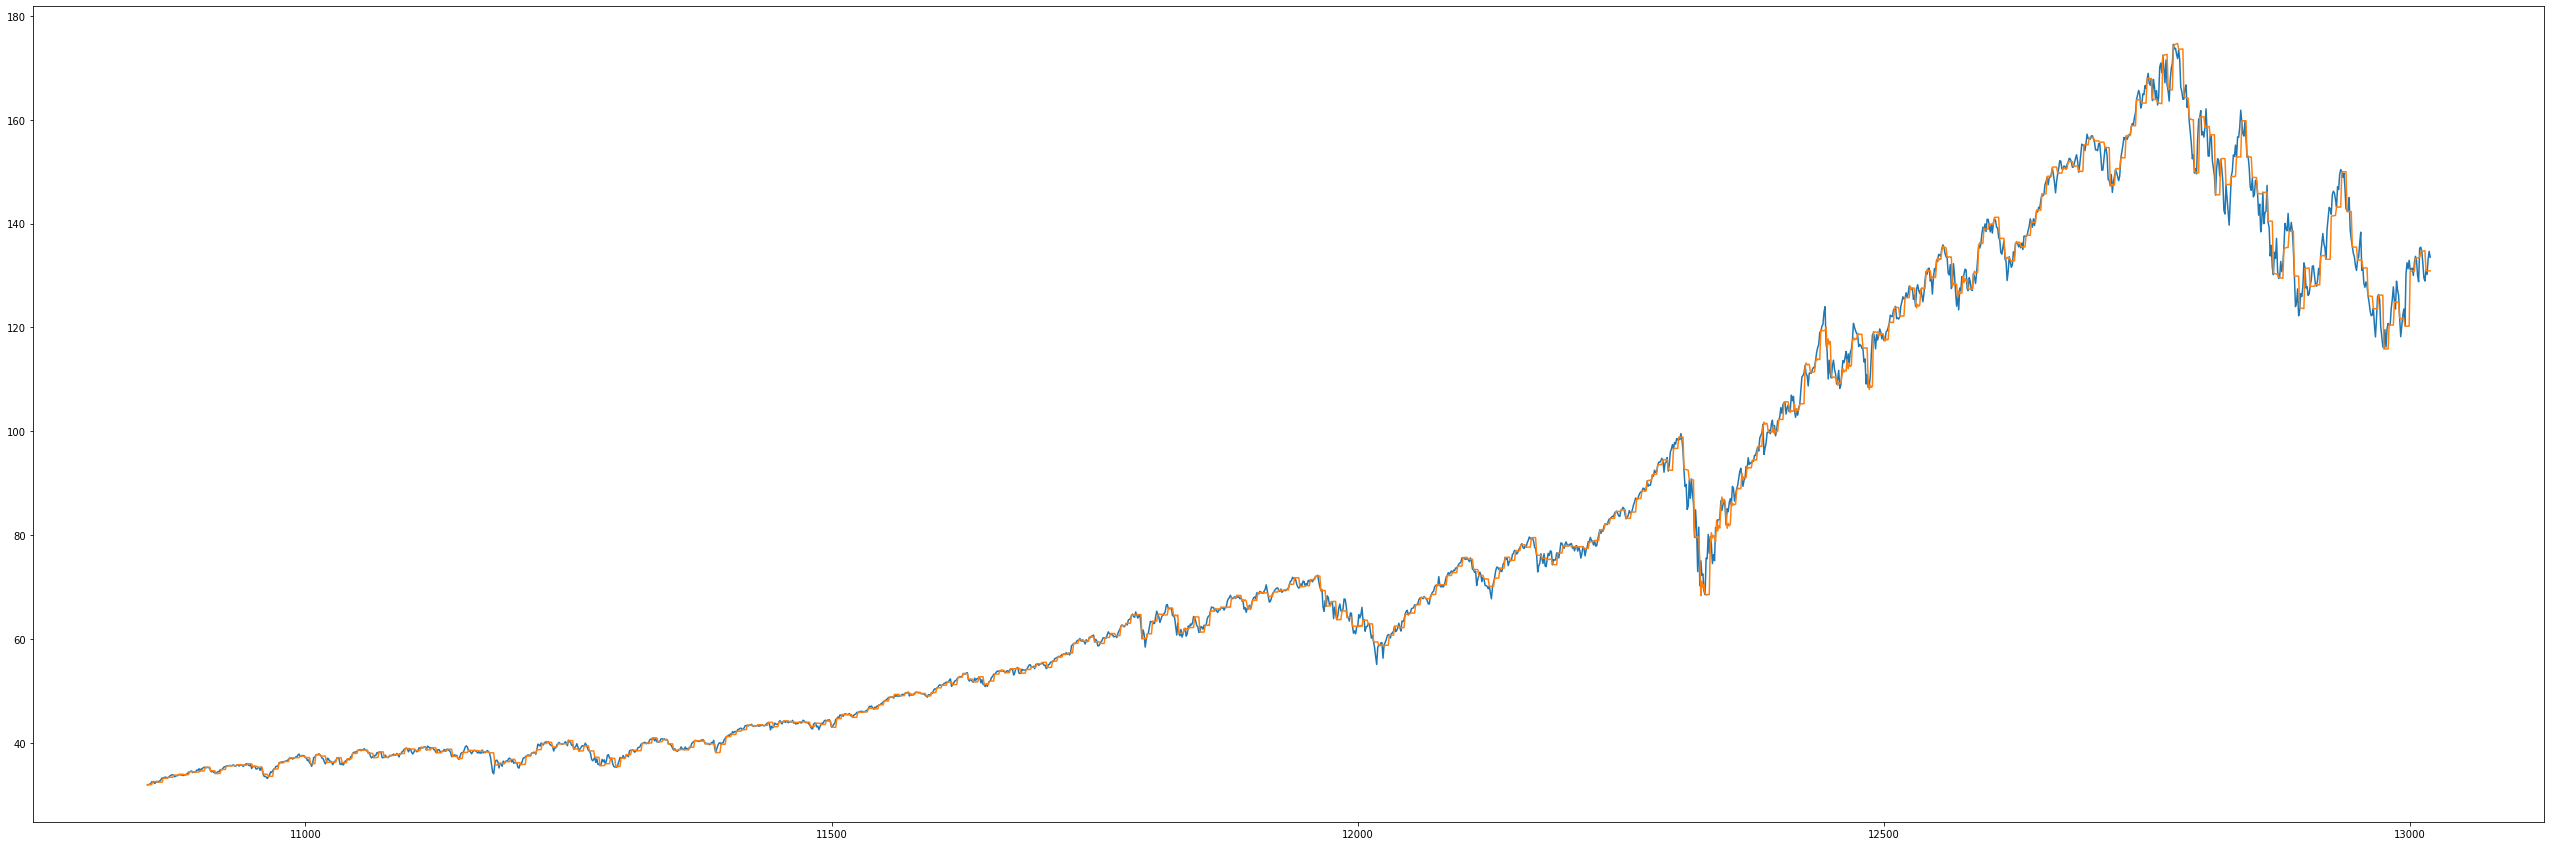

XLV


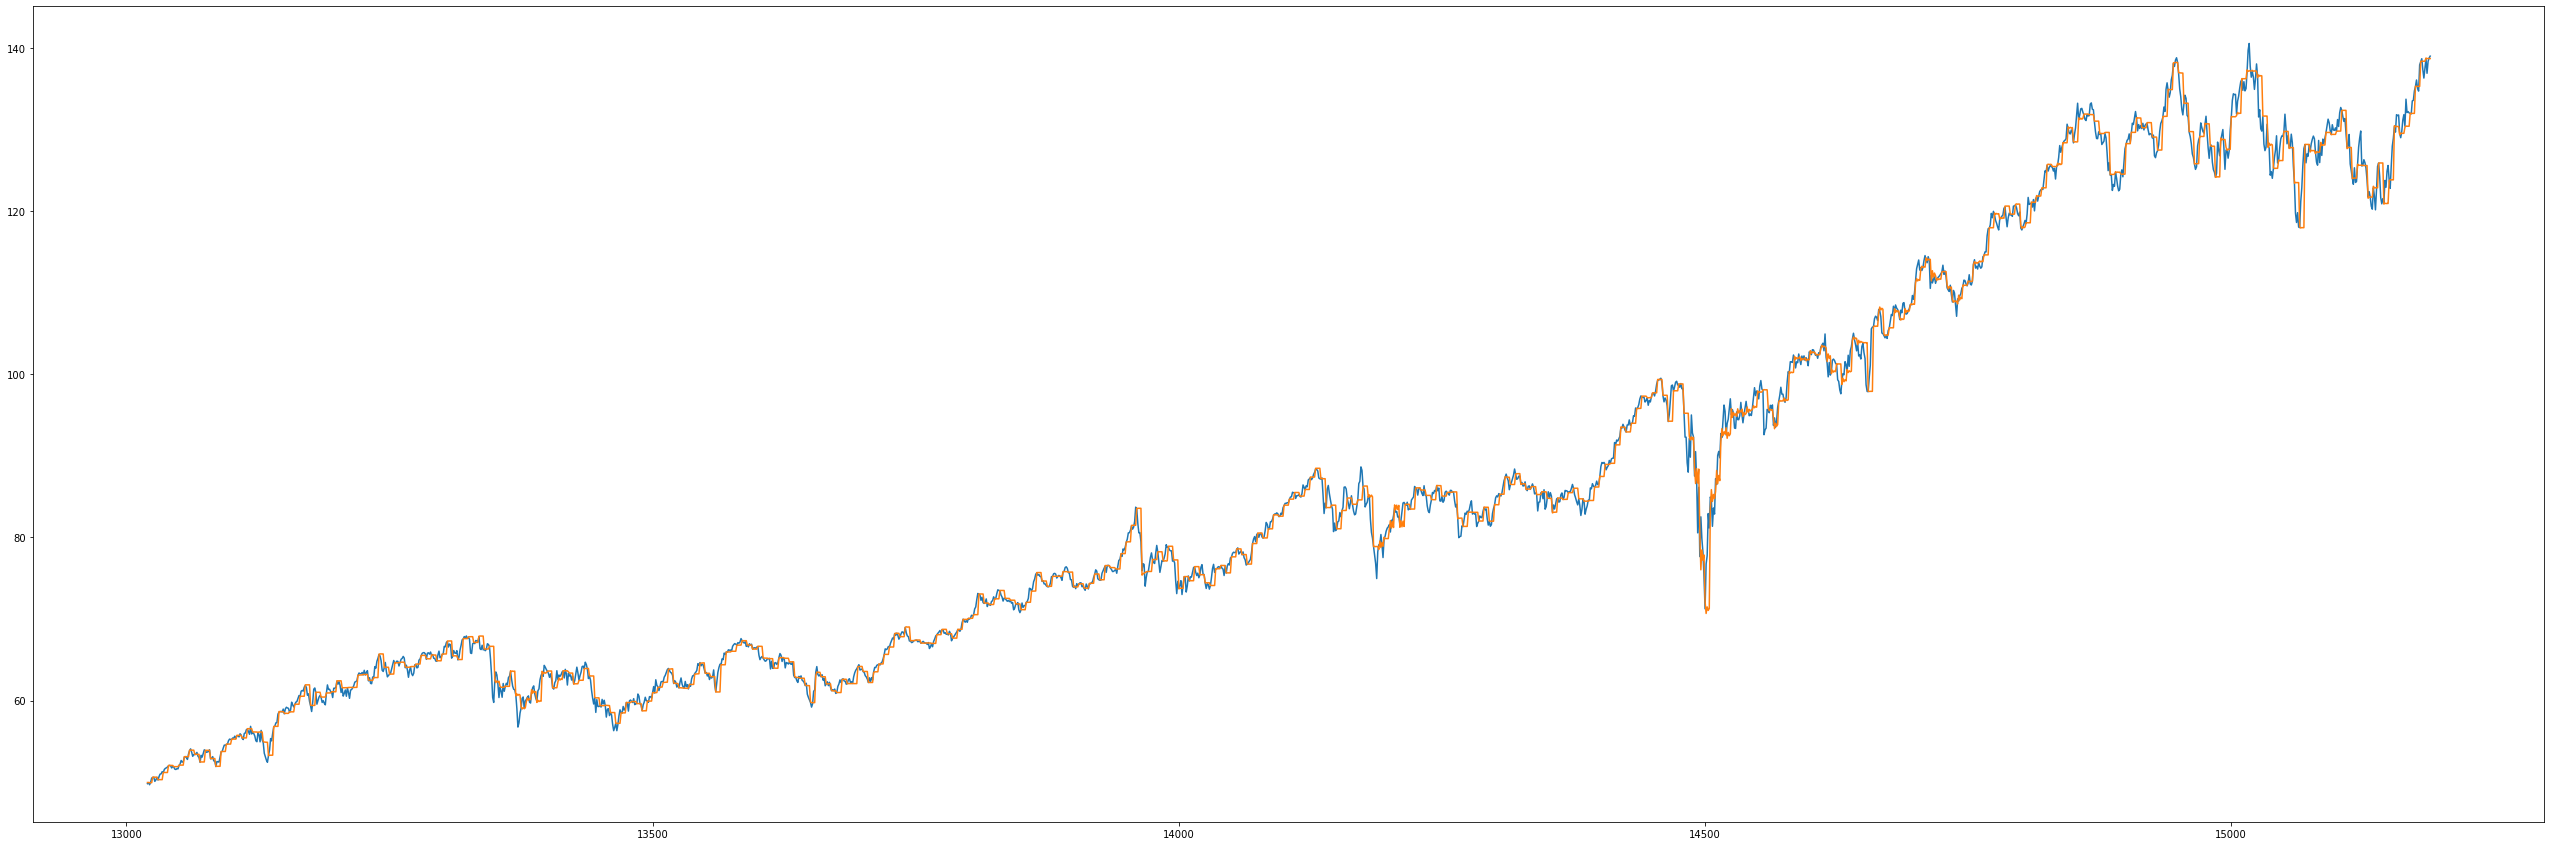

XLY


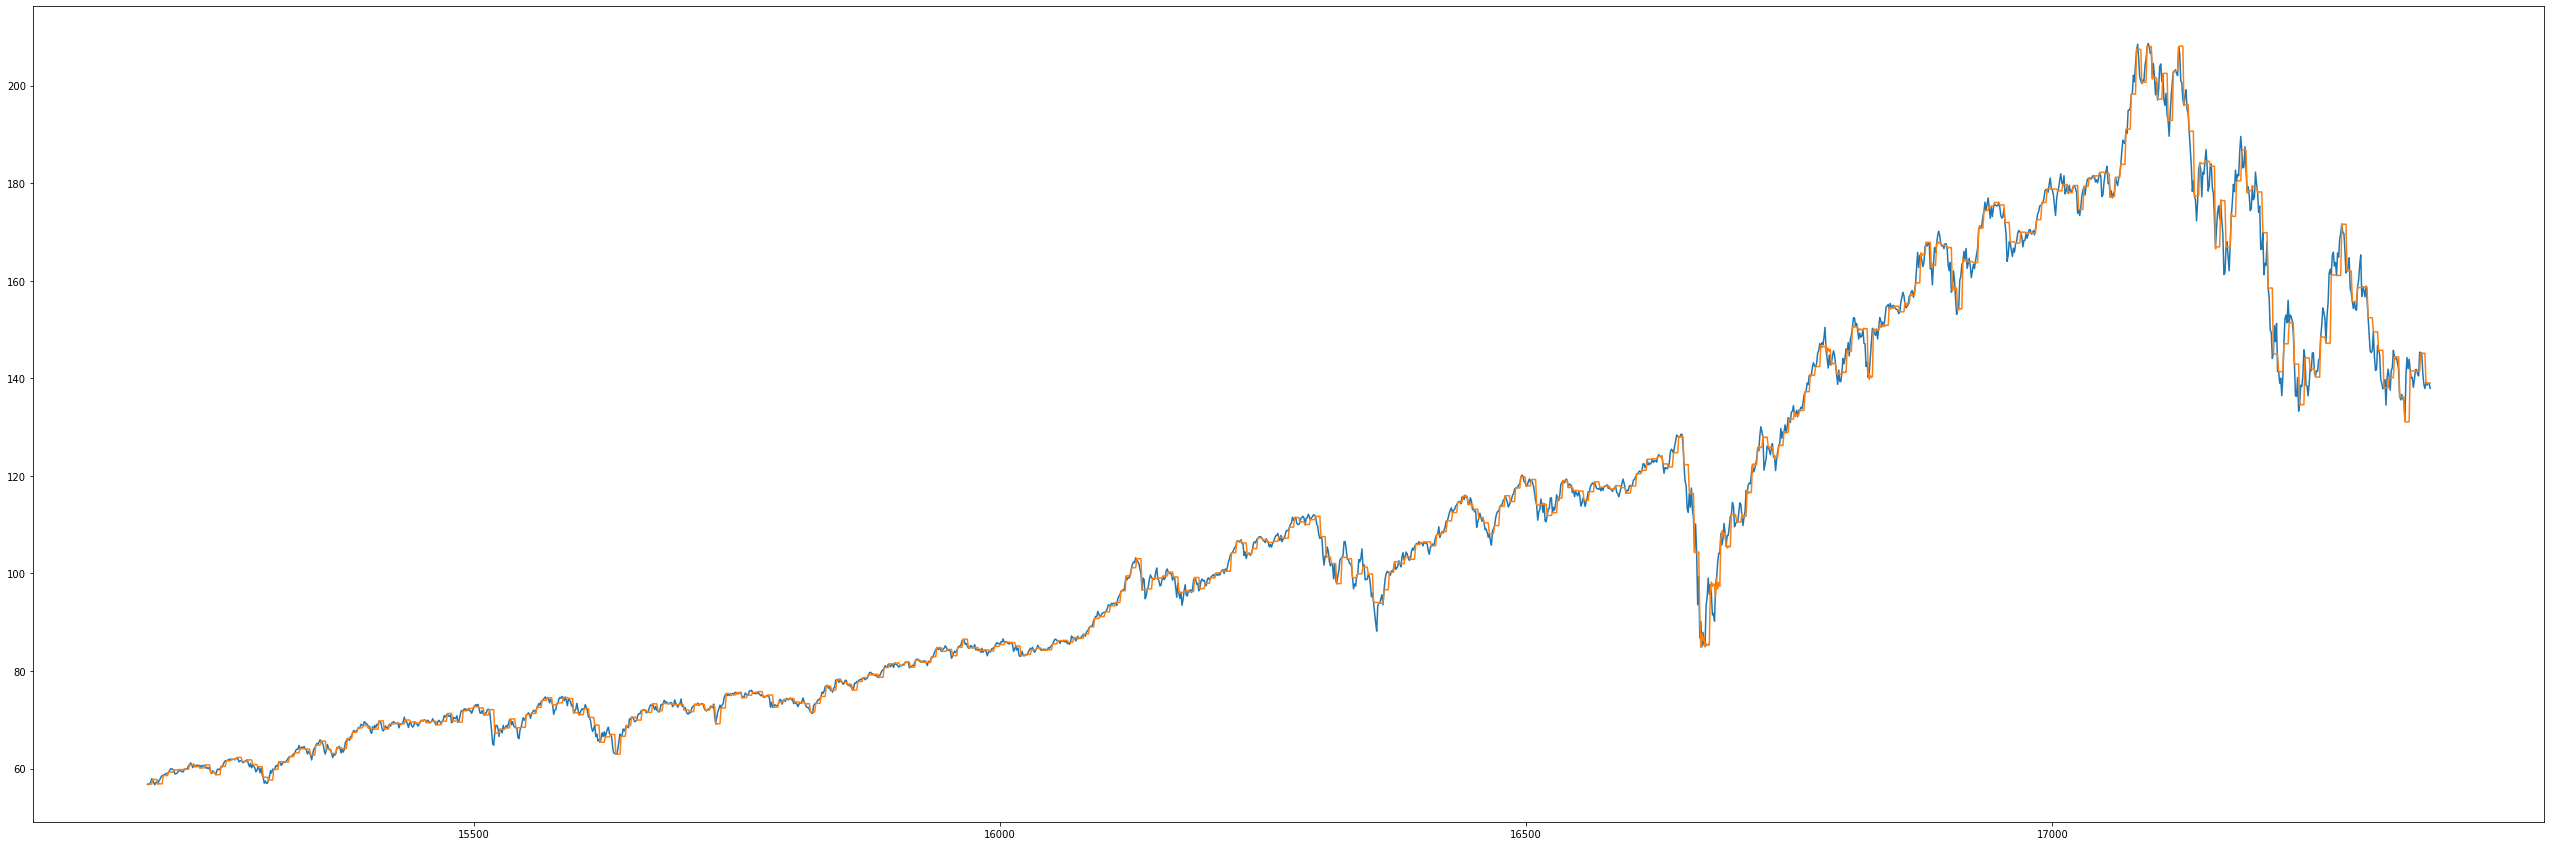

XLP


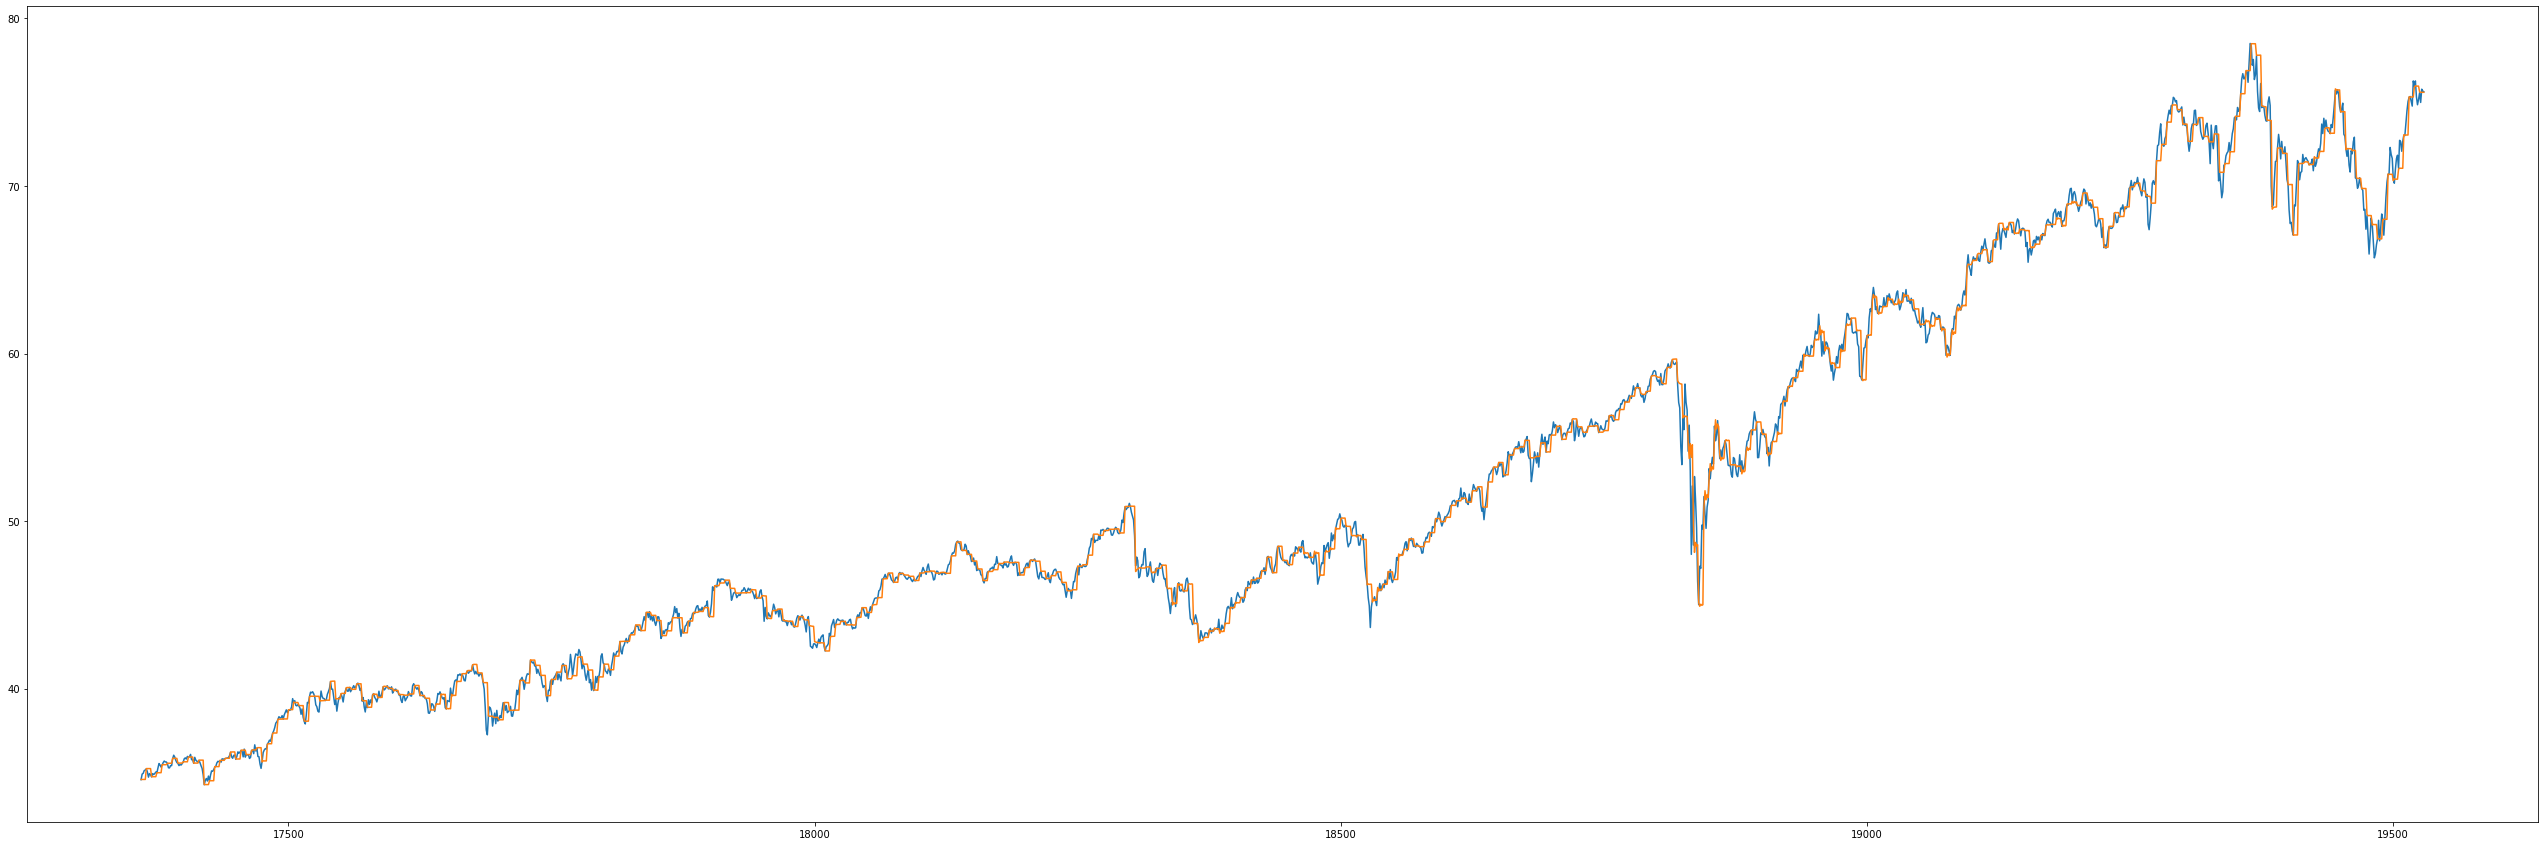

XLB


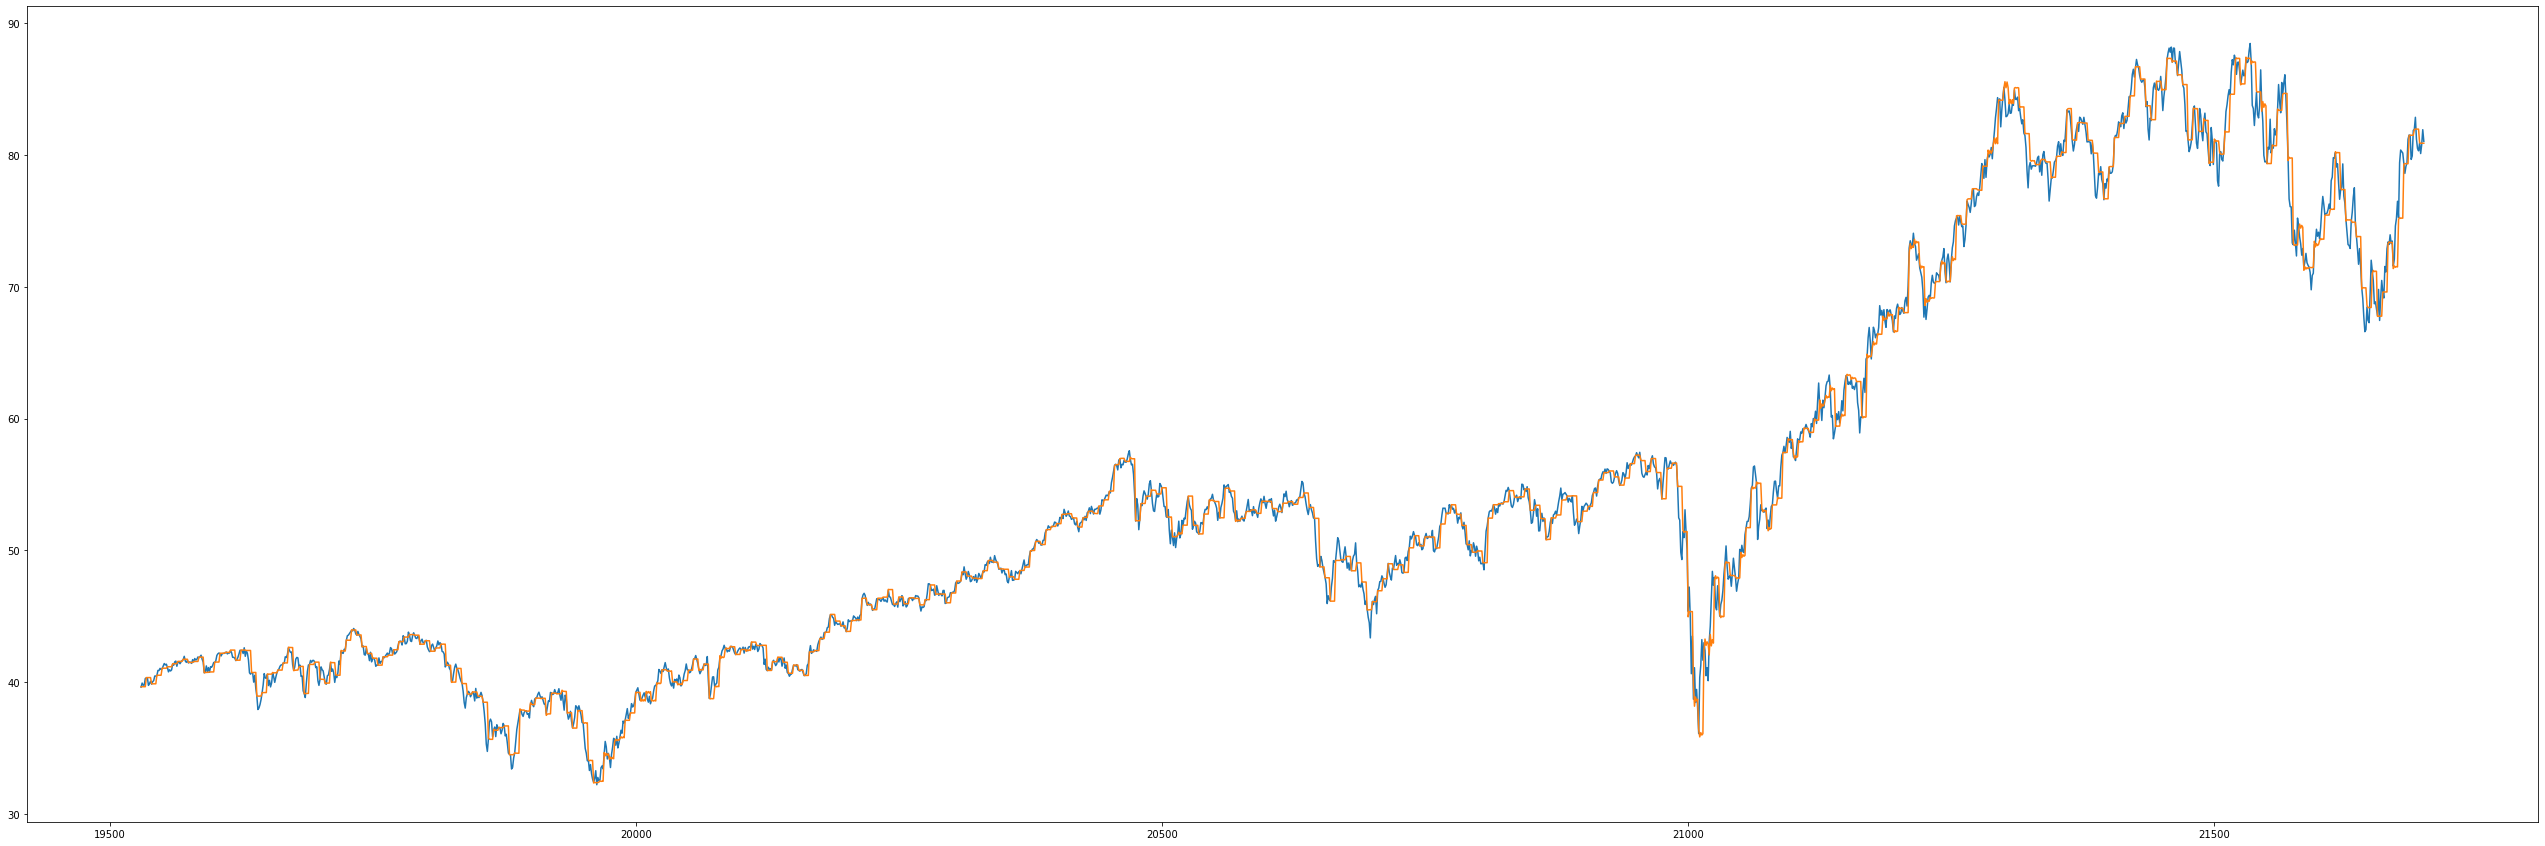

XLC


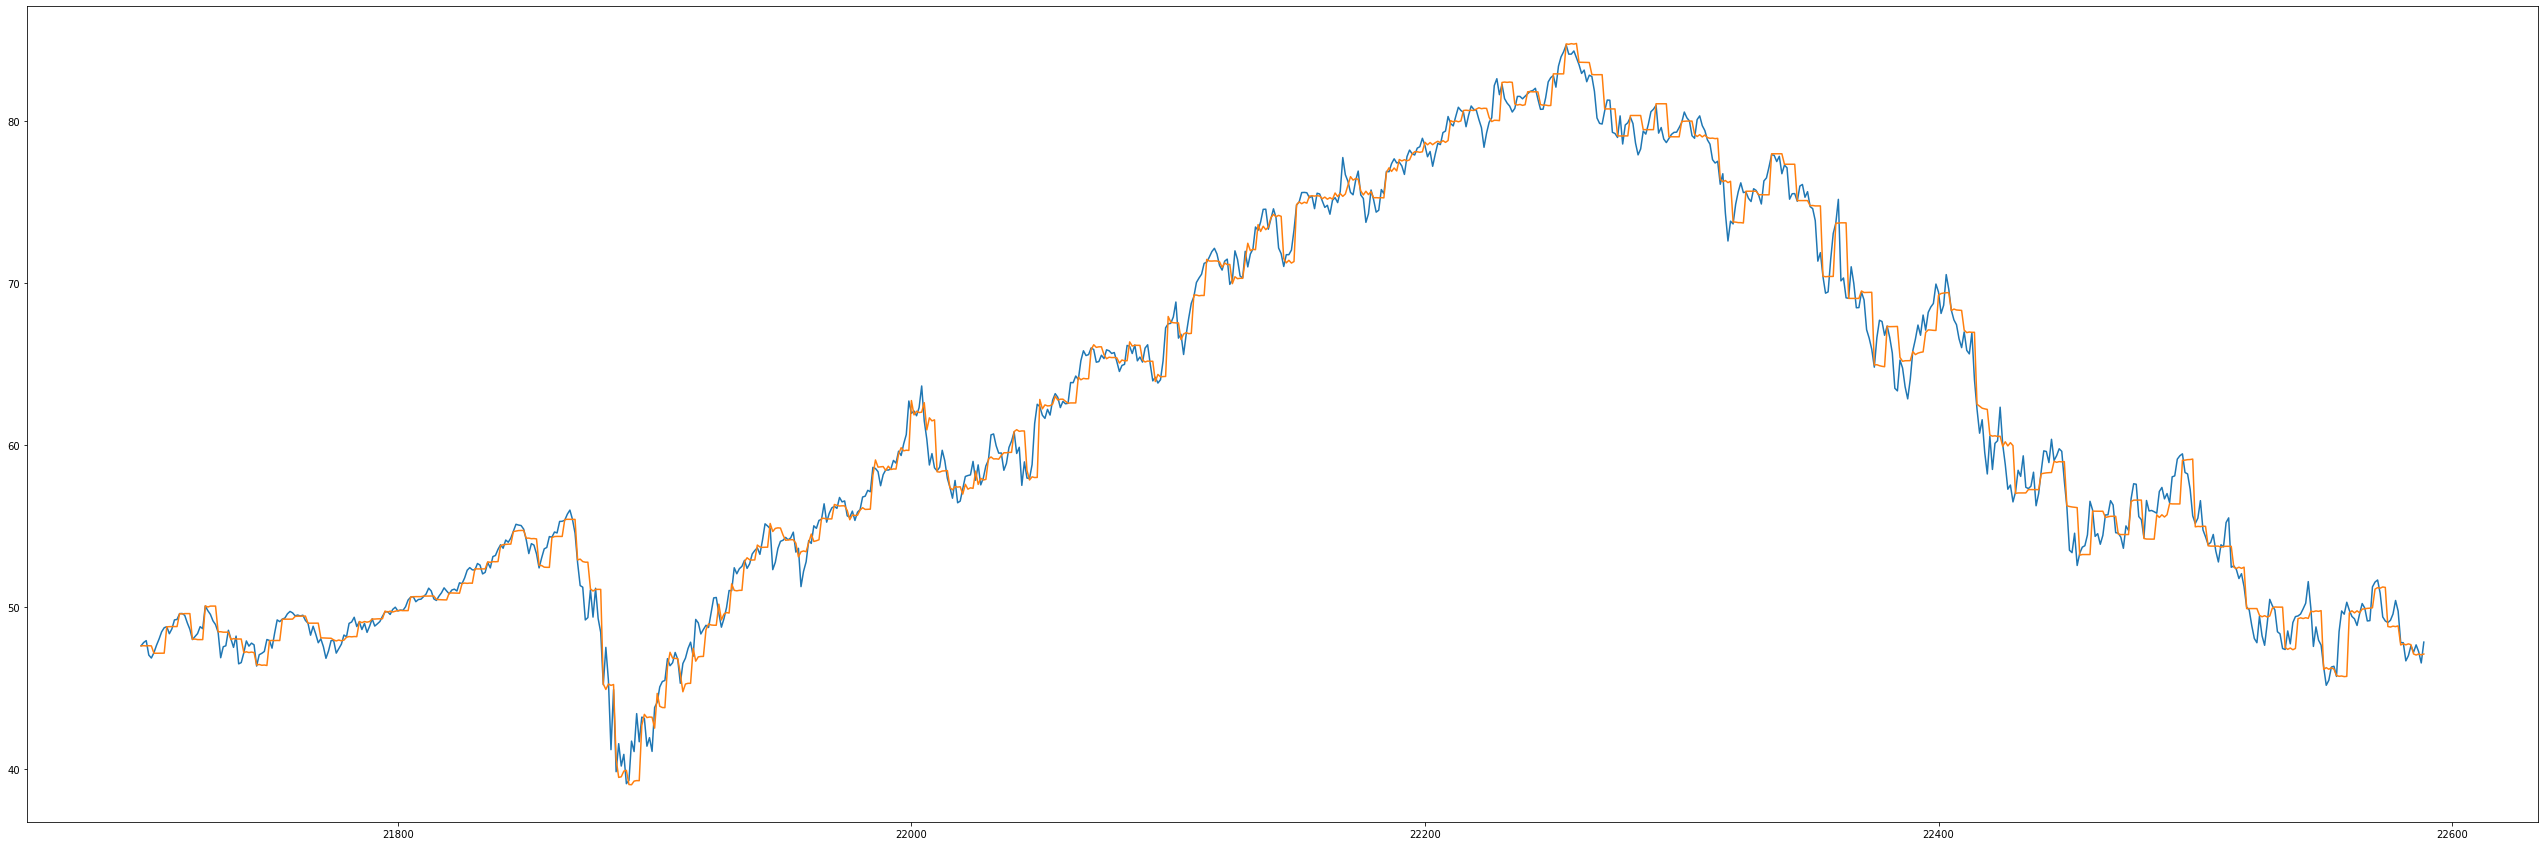

XBI


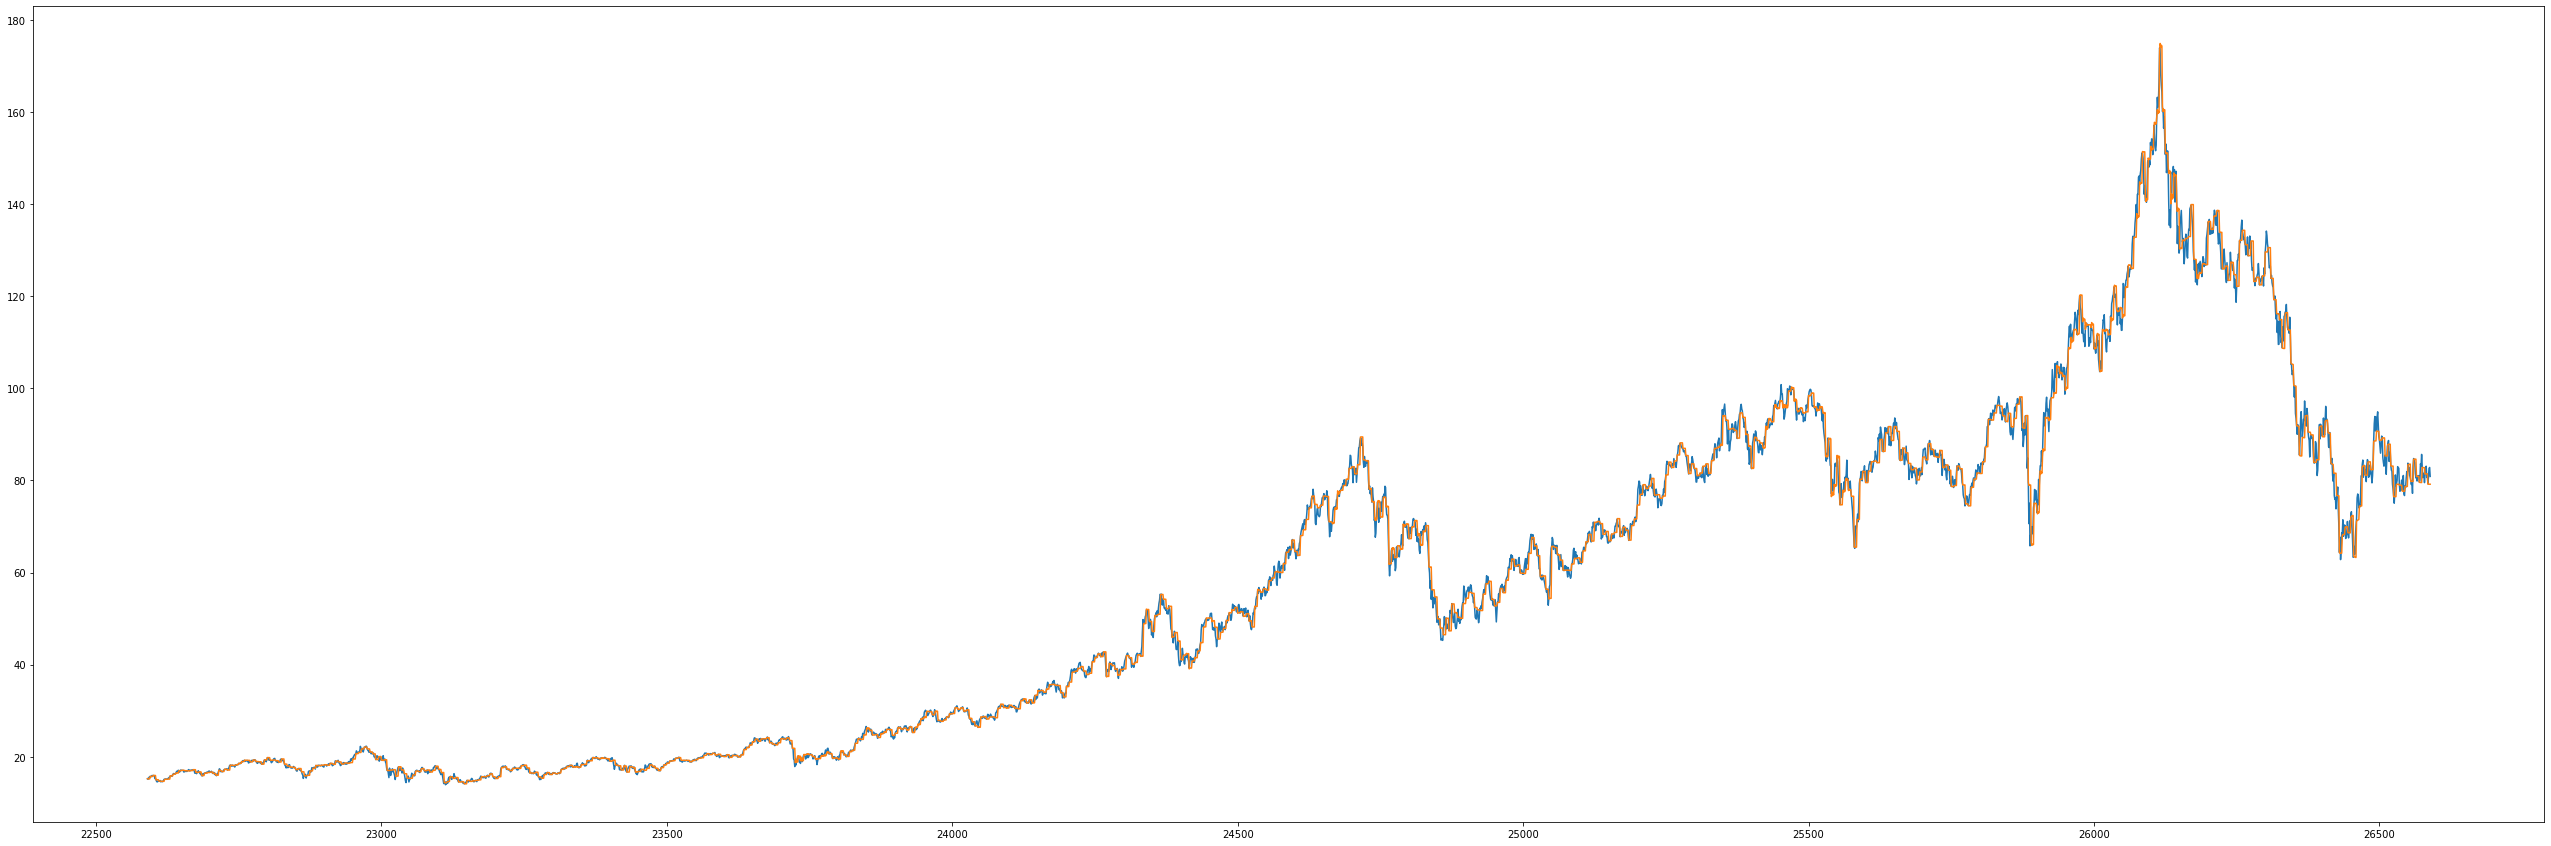

XME


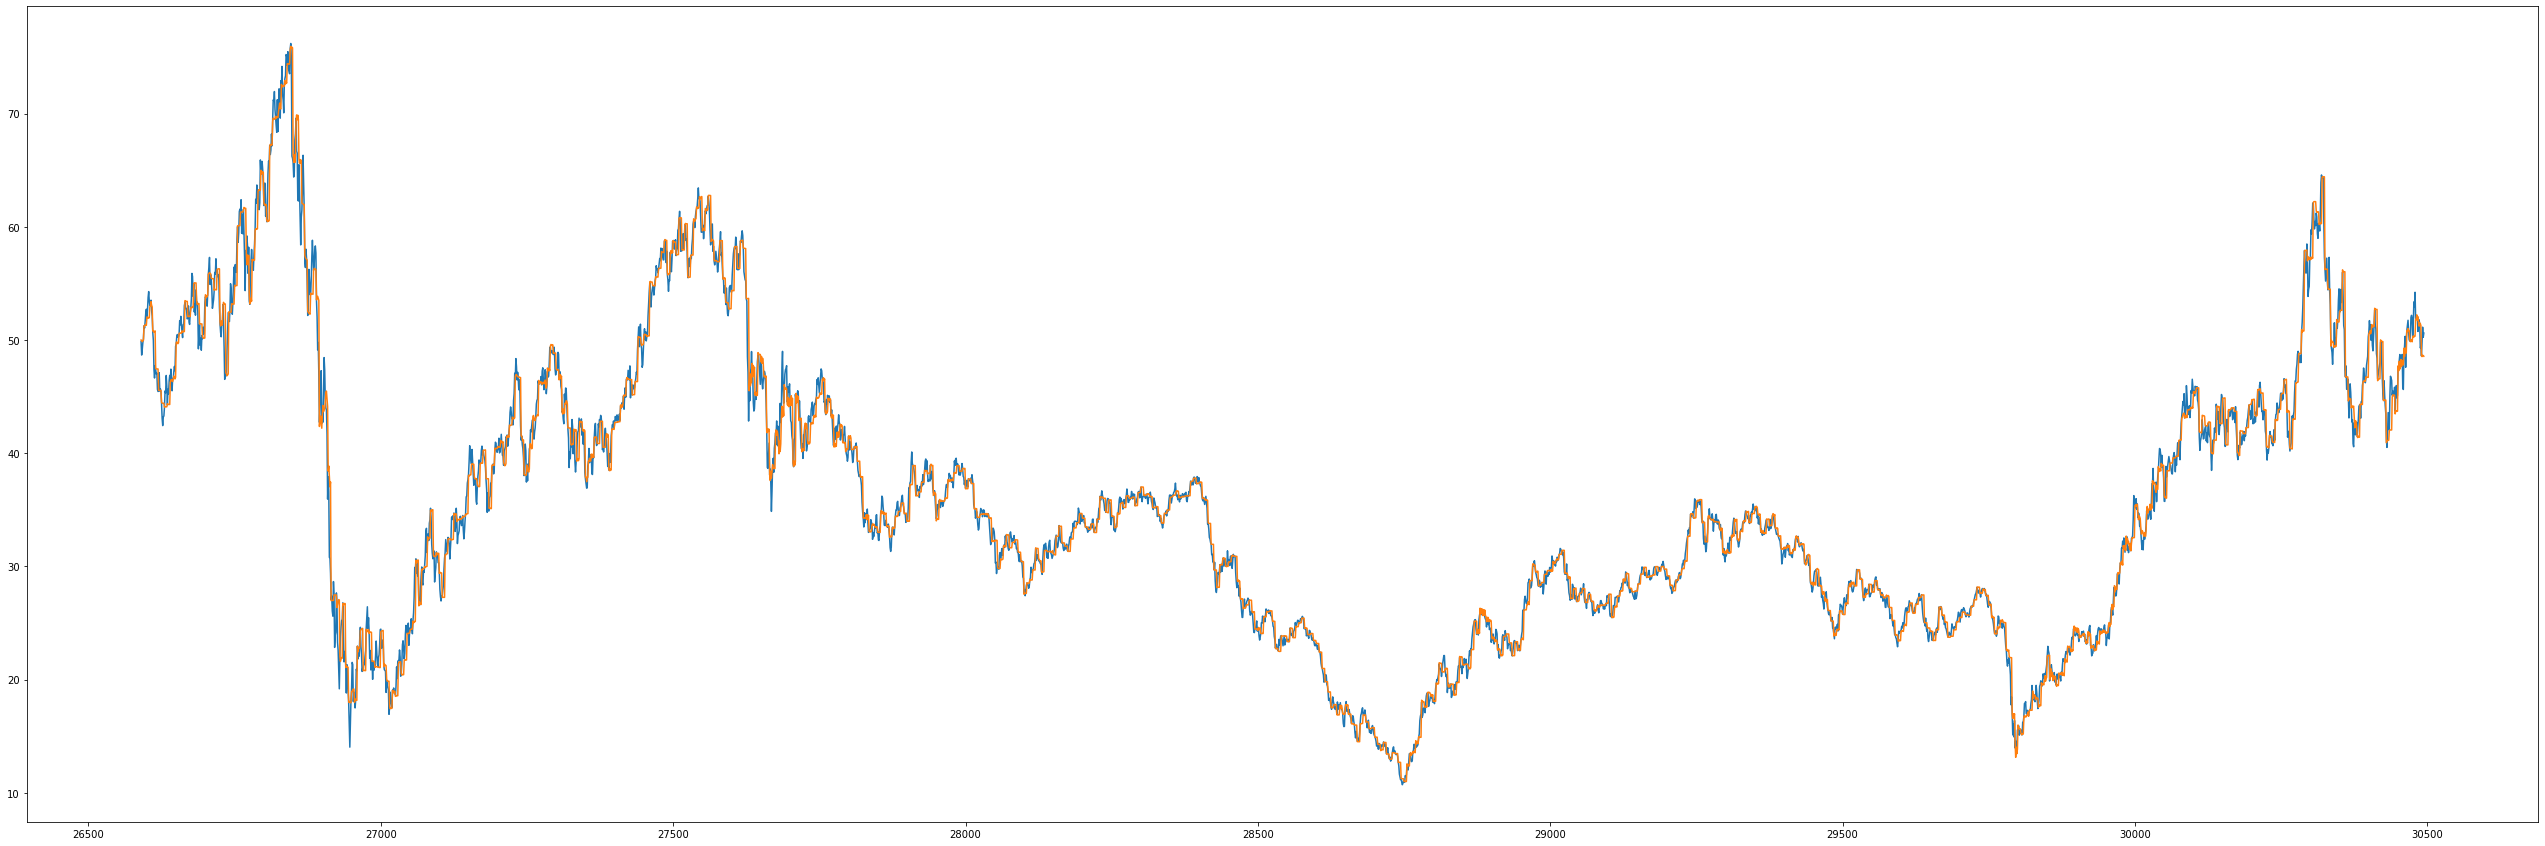

XTN


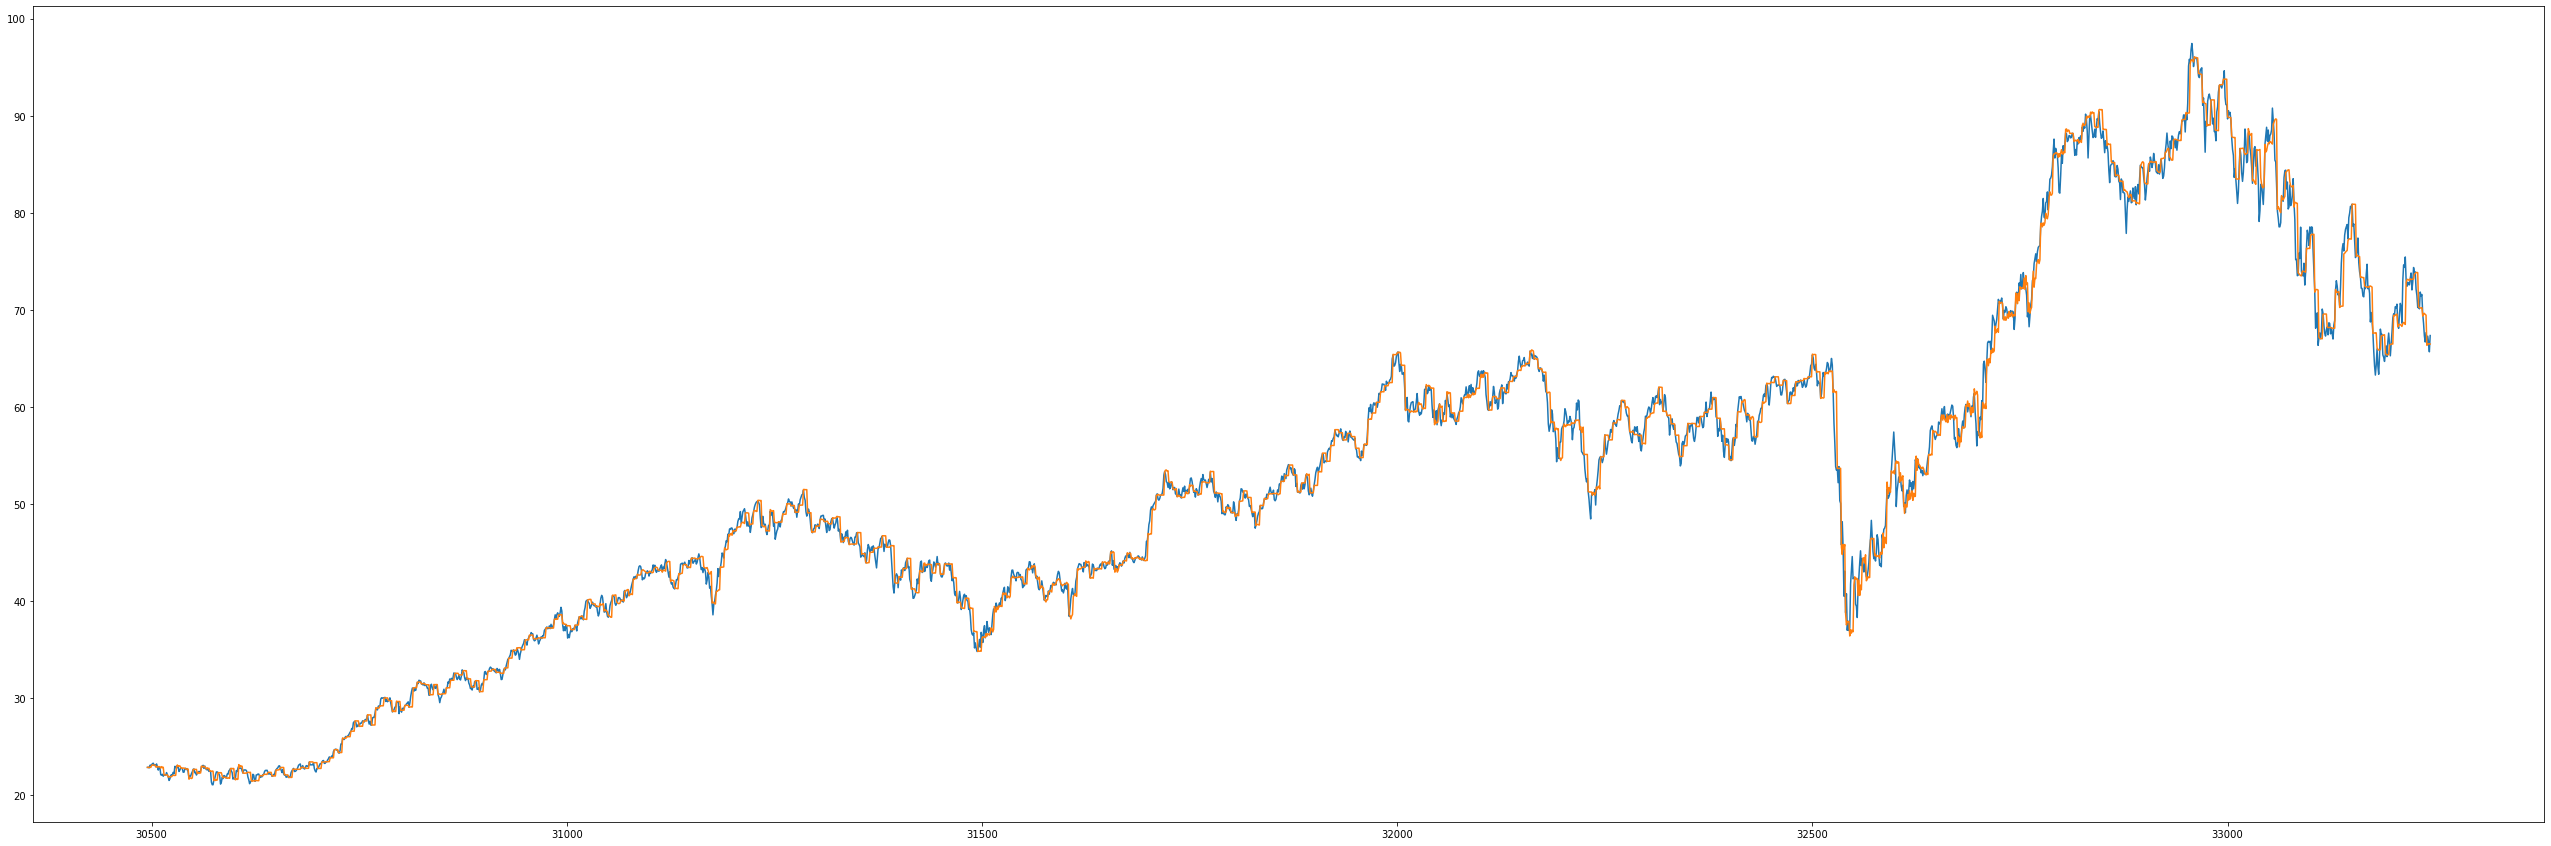

XTL


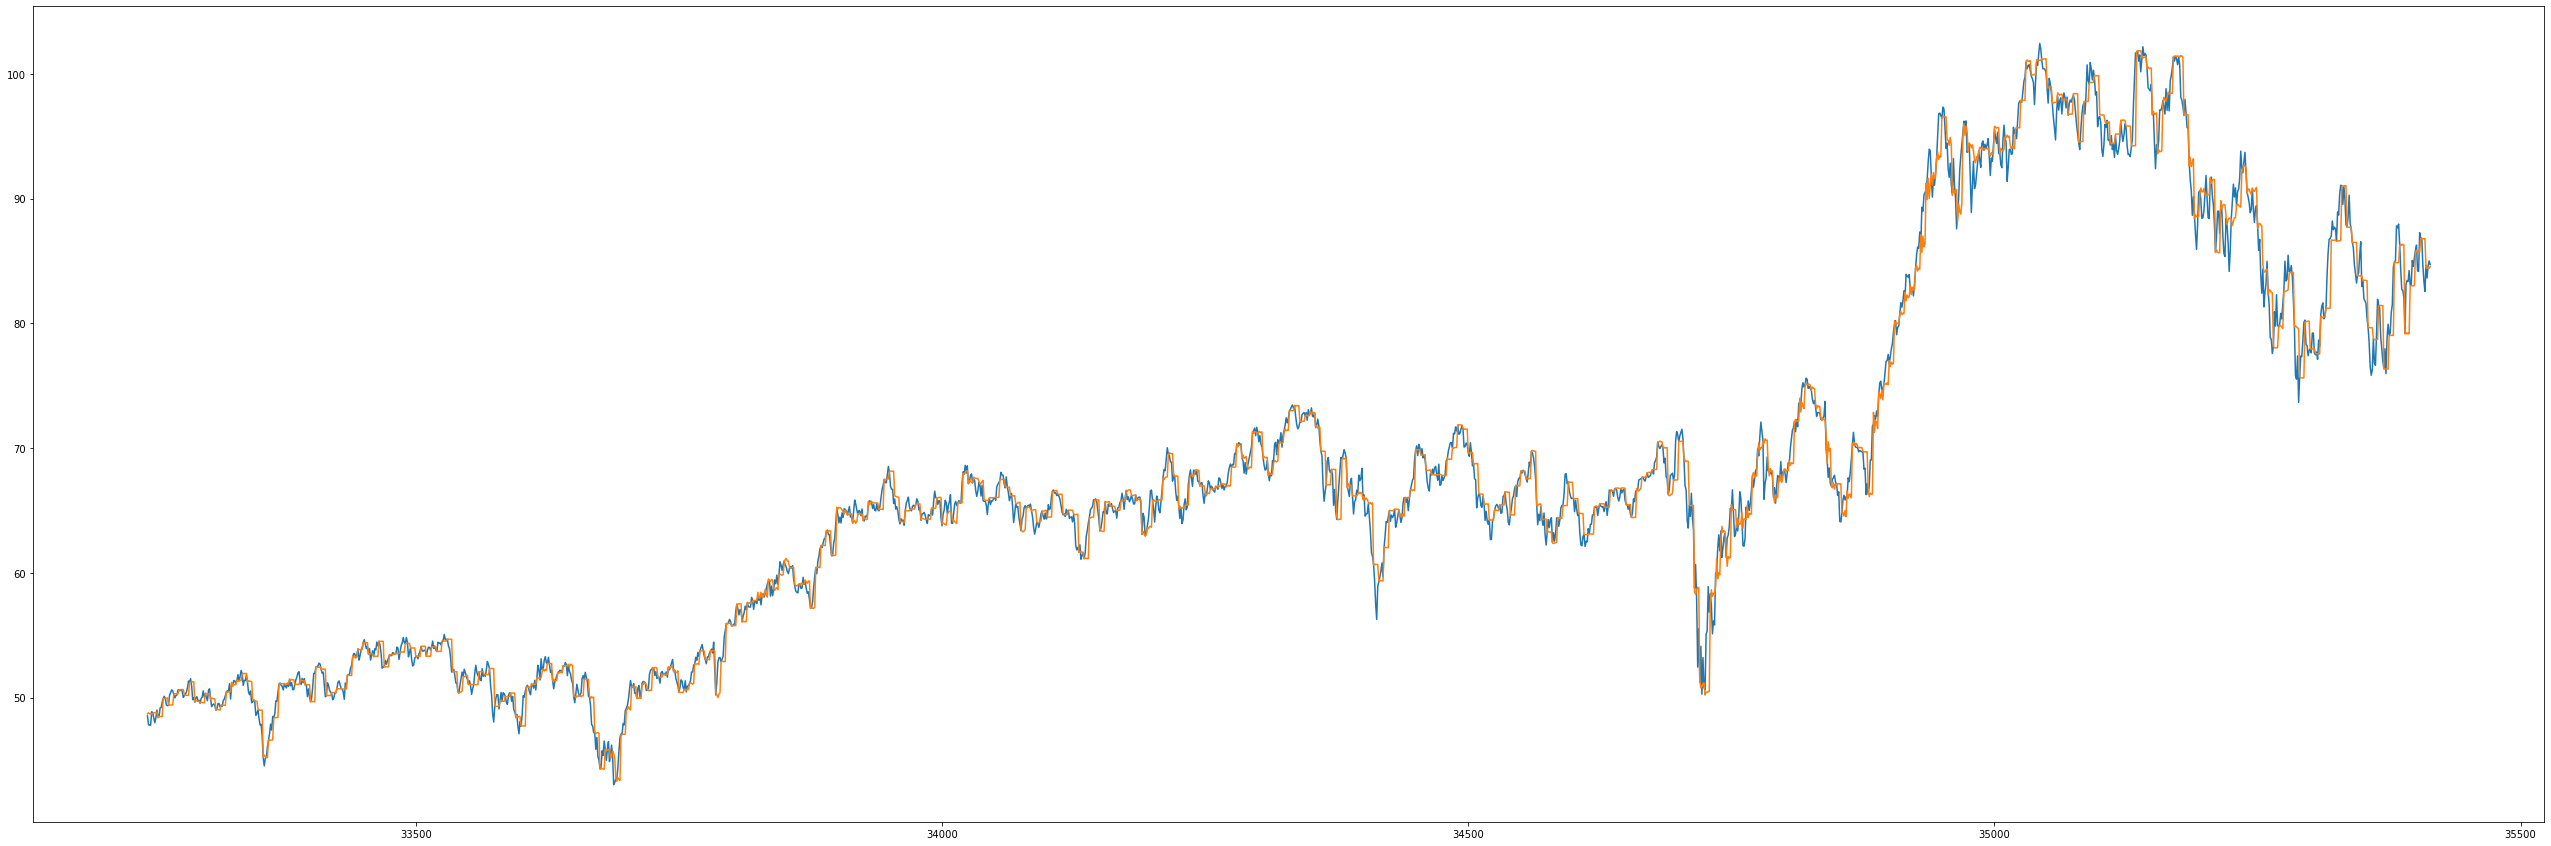

In [5]:
for product in merge_df['product_name'].unique():

    print(product)
    plt.figure(figsize=(45,15))
    plt.plot(merge_df[merge_df['product_name'] == product]['Close'])
    plt.plot(merge_df[merge_df['product_name'] == product]['pointForecast'])
    plt.show()

# Calculating profit and loss

In [7]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loop over the list of csv files
products  = ["XRT","XLF","XLE","XLU","XLI","XLK","XLV","XLY","XLP","XLB","XLC","XBI","XME","XHE","XHB","XTN","XHS","XTL"]
merge_lst = []

path      = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))
  
for product in products:
    
    for f in csv_files:
        if product+"_pnl" in f:
            pnl_df = pd.read_csv(f)      
            pnl_df['product_name'] = [product]*len(pnl_df)     

            close_df = pd.read_csv(product+'.csv')

            result = pd.merge(close_df[['Date','Close','Dividends','Stock Splits']], 
                            pnl_df[['asofdate', 'pnl','strategy','positionType','position_identifier']],
                            left_on='Date',
                            right_on='asofdate',
                            how='inner')

            merge_lst.append(result)

merge_df = pd.concat(merge_lst,axis=0).reset_index()

# saving the position ticker
cache_position_ticker = []

i = 0
while i < len(merge_df):

    cache_position_ticker.append(merge_df['position_identifier'][i].split("_")[0])

    i+=1

merge_df['product_name'] = cache_position_ticker

# save the position entry date

merge_df['position_identifier'].unique()

start_date = []

for position in merge_df['position_identifier'].unique():

    date = merge_df[merge_df['position_identifier'] == position].reset_index()['Date'][0]

    i = 0
    while i < len(merge_df[merge_df['position_identifier'] == position]):

        start_date.append(date)    

        i+=1

merge_df['entry_date'] = start_date

merge_df.reset_index()

,level_0,index,Date,Close,Dividends,Stock Splits,asofdate,pnl,strategy,positionType,position_identifier,product_name,entry_date
0,0,0,2014-05-13 00:00:00-04:00,36.989960,0.0,0.0,2014-05-13 00:00:00-04:00,0.0,arma_ma,no_position,XRT_no_position_0,XRT,2014-05-13 00:00:00-04:00
1,1,1,2014-05-14 00:00:00-04:00,36.482220,0.0,0.0,2014-05-14 00:00:00-04:00,0.0,arma_ma,no_position,XRT_no_position_0,XRT,2014-05-13 00:00:00-04:00
2,2,2,2014-05-15 00:00:00-04:00,36.053284,0.0,0.0,2014-05-15 00:00:00-04:00,0.0,arma_ma,no_position,XRT_no_position_0,XRT,2014-05-13 00:00:00-04:00
3,3,3,2014-05-16 00:00:00-04:00,36.578518,0.0,0.0,2014-05-16 00:00:00-04:00,0.0,arma_ma,no_position,XRT_no_position_0,XRT,2014-05-13 00:00:00-04:00
4,4,4,2014-05-19 00:00:00-04:00,36.722958,0.0,0.0,2014-05-19 00:00:00-04:00,0.0,arma_ma,no_position,XRT_no_position_0,XRT,2014-05-13 00:00:00-04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35335,35335,2160,2022-12-08 00:00:00-05:00,84.677643,0.0,0.0,2022-12-08 00:00:00-05:00,0.0,arma_ma,no_position,XTL_no_position_2160,XTL,2022-12-08 00:00:00-05:00
35336,35336,2161,2022-12-09 00:00:00-05:00,83.640244,0.0,0.0,2022-12-09 00:00:00-05:00,0.0,arma_ma,no_position,XTL_no_position_2160,XTL,2022-12-08 00:00:00-05:00
35337,35337,2162,2022-12-12 00:00:00-05:00,84.587868,0.0,0.0,2022-12-12 00:00:00-05:00,0.0,arma_ma,no_position,XTL_no_position_2160,XTL,2022-12-08 00:00:00-05:00
35338,35338,2163,2022-12-13 00:00:00-05:00,85.006813,0.0,0.0,2022-12-13 00:00:00-05:00,0.0,arma_ma,no_position,XTL_no_position_2160,XTL,2022-12-08 00:00:00-05:00


In [8]:
test_df = merge_df.copy()

In [18]:
portfolio_value = 100000
position_size   = 1/len(merge_df['product_name'].unique())

hist_portfolio_value = []
position_scaled_df   = []
updated_position_lst = []

for date in merge_df['entry_date'].unique():

    
    position_scaled_df   = []
    # updated_position_lst = []
    for position in  merge_df[merge_df['entry_date'] == date]['position_identifier'].unique():

        position_df = merge_df[(merge_df['position_identifier'] == position)]
        position_df.reset_index(inplace=True)

        scale         = []
        portfolio_lst = []

        i = 0
        while i < len(position_df):

            if position_df['positionType'][i] == 'long':
                scale.append(np.floor(portfolio_value*position_size/position_df['Close'][0]))

            if position_df['positionType'][i] == 'short':
                scale.append(np.floor(portfolio_value*position_size/position_df['Close'][0]))

            if position_df['positionType'][i] == 'no_position':
                scale.append(0)

            portfolio_lst.append(portfolio_value)

            i+=1

        position_df['scale']           = scale
        position_df['rescaled_pnl']    = position_df['scale']*position_df['pnl']
        position_df['portfolio_value'] = portfolio_lst
 
        position_scaled_df.append(position_df)

    updated_position_df = pd.concat(position_scaled_df,axis = 0)
    portfolio_value     = portfolio_value + updated_position_df['rescaled_pnl'].sum()

    updated_position_lst.append(pd.concat(position_scaled_df,axis = 0))



c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\James Stanley\anaconda3\envs\airflow-env\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [19]:
portfolio_df = pd.concat(updated_position_lst,axis=0)

In [20]:
portfolio_df.head()

,level_0,index,Date,Close,Dividends,Stock Splits,asofdate,pnl,strategy,positionType,position_identifier,product_name,entry_date,scale,rescaled_pnl,portfolio_value
0,0,0,2014-05-13 00:00:00-04:00,36.989960,0.0,0.0,2014-05-13 00:00:00-04:00,0.0,arma_ma,no_position,XRT_no_position_0,XRT,2014-05-13 00:00:00-04:00,0.0,0.0,100000.0
1,1,1,2014-05-14 00:00:00-04:00,36.482220,0.0,0.0,2014-05-14 00:00:00-04:00,0.0,arma_ma,no_position,XRT_no_position_0,XRT,2014-05-13 00:00:00-04:00,0.0,0.0,100000.0
2,2,2,2014-05-15 00:00:00-04:00,36.053284,0.0,0.0,2014-05-15 00:00:00-04:00,0.0,arma_ma,no_position,XRT_no_position_0,XRT,2014-05-13 00:00:00-04:00,0.0,0.0,100000.0
3,3,3,2014-05-16 00:00:00-04:00,36.578518,0.0,0.0,2014-05-16 00:00:00-04:00,0.0,arma_ma,no_position,XRT_no_position_0,XRT,2014-05-13 00:00:00-04:00,0.0,0.0,100000.0
4,4,4,2014-05-19 00:00:00-04:00,36.722958,0.0,0.0,2014-05-19 00:00:00-04:00,0.0,arma_ma,no_position,XRT_no_position_0,XRT,2014-05-13 00:00:00-04:00,0.0,0.0,100000.0


In [21]:
portfolio_df = portfolio_df[['rescaled_pnl','Date']].groupby('Date').sum()

In [22]:
portfolio_df

,rescaled_pnl
Date,
2007-02-14 00:00:00-05:00,0.000000
2007-02-15 00:00:00-05:00,0.000000
2007-02-16 00:00:00-05:00,0.000000
2007-02-20 00:00:00-05:00,0.000000
2007-02-21 00:00:00-05:00,0.000000
...,...
2022-12-22 00:00:00-05:00,-1852.203140
2022-12-23 00:00:00-05:00,-246.957802
2022-12-27 00:00:00-05:00,0.000000


In [23]:
portfolio_df['rescaled_pnl'].cumsum().iloc[-1]

1149557.1421012876

In [24]:
7600093.063024519

7600093.063024519

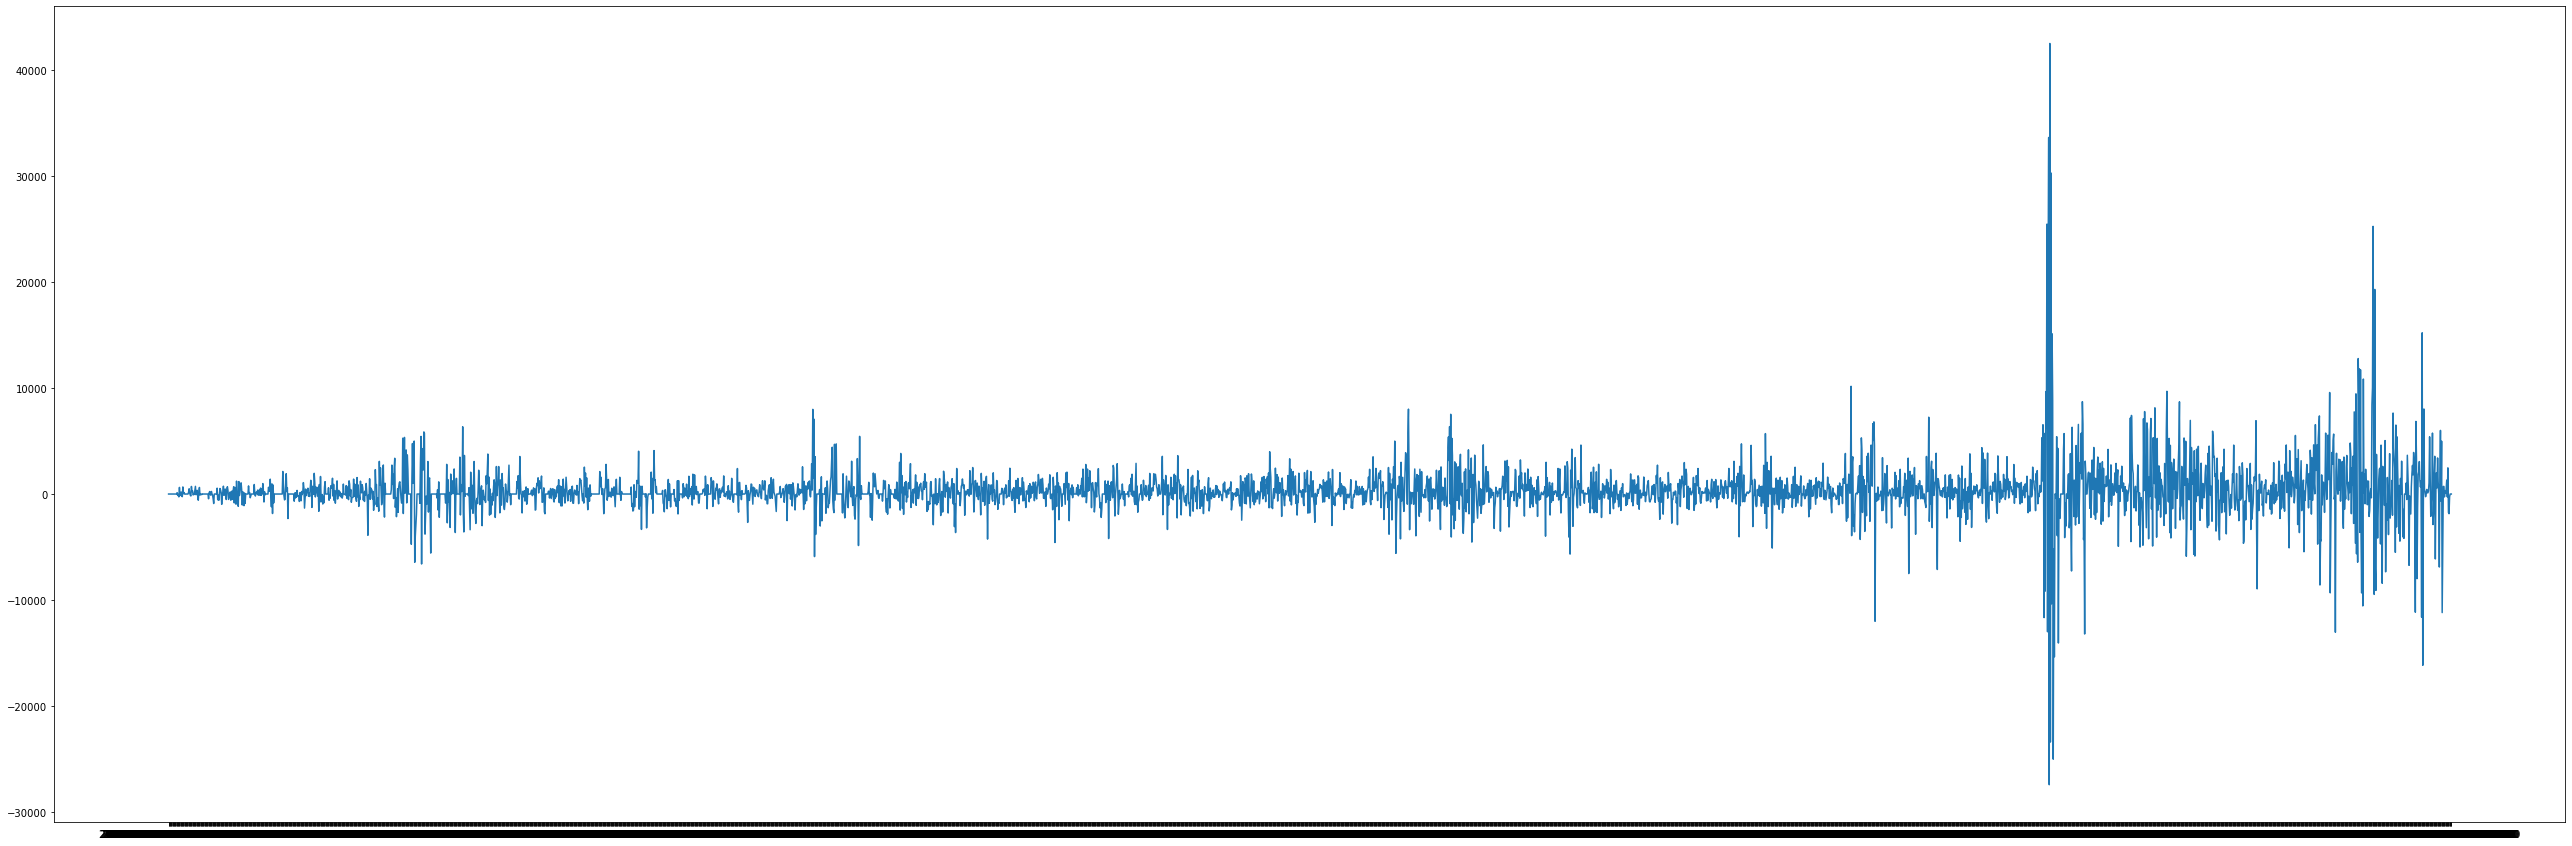

In [25]:
plt.figure(figsize=(45,15))

plt.plot(portfolio_df['rescaled_pnl'])

plt.show()

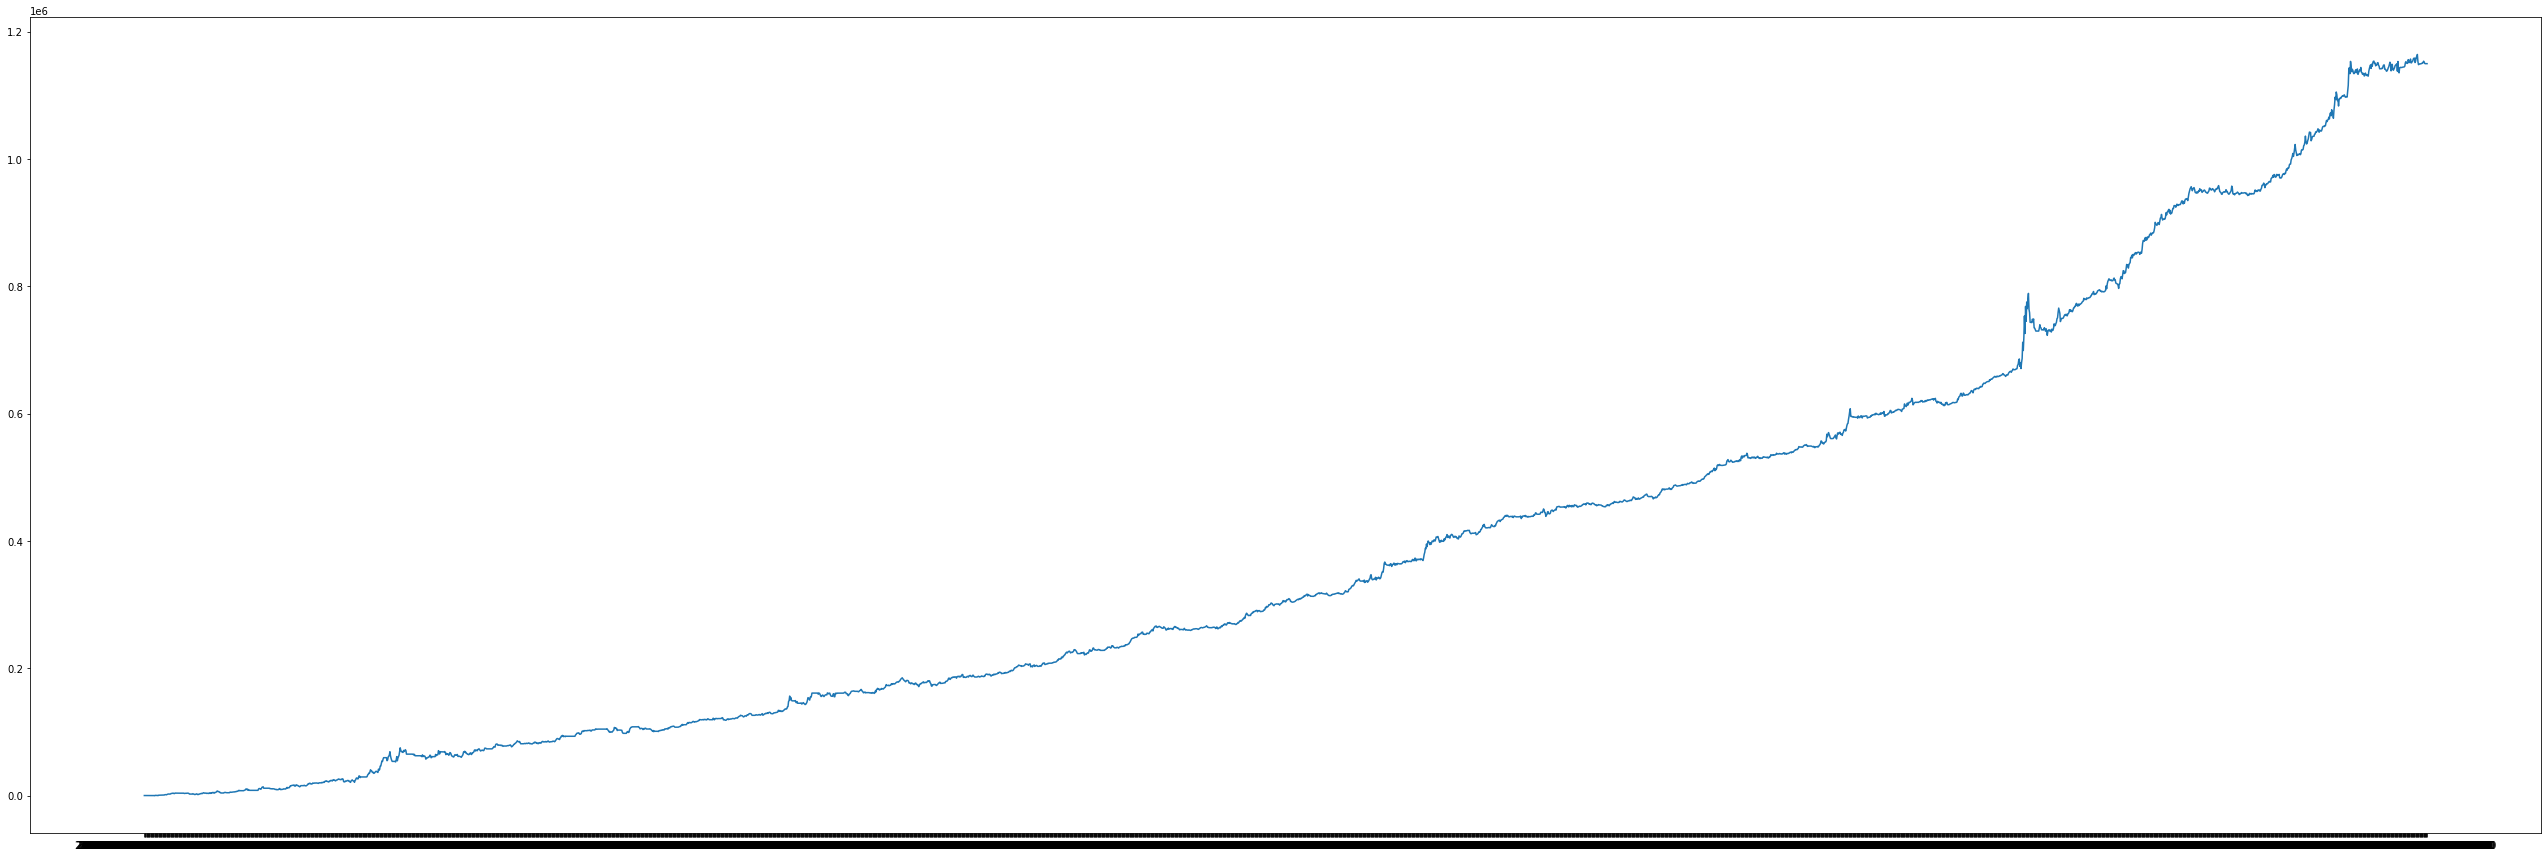

In [26]:
plt.figure(figsize=(45,15))

plt.plot(portfolio_df['rescaled_pnl'].cumsum())

plt.show()